ML PROJECT
Team Members
Utkarsh Rajauria (2019214)
Aadarsh (2019131)
Amit Chaurasiya (2019142)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## DATA Loading

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales.csv")
print(df.head())

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

Label-Encoding


In [ ]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
## In Our dataset, There is no null values
df=df.dropna()
print(df['Month'].unique())
month_dict={'January':1, 'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
print()
def fun_month(s):

  # print(1)
  return month_dict[s]

df['Month']=df['Month'].apply(fun_month)

['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'June' 'October' 'April']



o- MALE
1- Female

In [ ]:
def fun_Gender(s):
  if(s=='M'):
    return 0;
  else:
    return 1;

df['Customer_Gender']=df['Customer_Gender'].apply(fun_Gender)


In [ ]:
df['Age_Group'].unique()


array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

Age_Group
Youth (<25)--->0
Adults (35-64)--->1
Young Adults (25-34)--->2
Seniors (64+)--->3



In [ ]:
def fun_AgeGroup(s):
  if(s=='Youth (<25)'):
    return 0;
  elif(s=='Adults (35-64)'):
    return 1
  elif(s=='Young Adults (25-34)'):
    return 2
  elif(s=='Seniors (64+)'):
    return 3
  else:
    return -1;

df['Age_Group']=df['Age_Group'].apply(fun_AgeGroup)

Label-Encoding of States

In [ ]:
import numpy as np
k=df['State'].unique()
print(len(k))
values=np.zeros(len(k))
for i in range(len(values)):
  values[i]=i
print(values)
dic=dict(zip(k,values))
print(dic)

53
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.]
{'British Columbia': 0.0, 'New South Wales': 1.0, 'Victoria': 2.0, 'Oregon': 3.0, 'California': 4.0, 'Saarland': 5.0, 'Seine Saint Denis': 6.0, 'Moselle': 7.0, 'Queensland': 8.0, 'England': 9.0, 'Nord': 10.0, 'Washington': 11.0, 'Hessen': 12.0, 'Nordrhein-Westfalen': 13.0, 'Hamburg': 14.0, 'Loir et Cher': 15.0, 'Kentucky': 16.0, 'Seine (Paris)': 17.0, 'South Australia': 18.0, 'Loiret': 19.0, 'Alberta': 20.0, 'Bayern': 21.0, 'Hauts de Seine': 22.0, 'Yveline': 23.0, 'Essonne': 24.0, "Val d'Oise": 25.0, 'Tasmania': 26.0, 'Seine et Marne': 27.0, 'Val de Marne': 28.0, 'Pas de Calais': 29.0, 'Charente-Maritime': 30.0, 'Garonne (Haute)': 31.0, 'Brandenburg': 32.0, 'Texas': 33.0, 'New York': 34.0, 'Florida': 35.0, 'Somme': 36.0, 'Illinois': 37.0, 'South Carolina': 38.0, 'North C

In [ ]:
def fun_State(s):
  return dic[s]
df['State']=df['State'].apply(fun_State)
print(df.head(10))

         Date  Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  \
0  2013-11-26   26     11  2013            19          0                0   
1  2015-11-26   26     11  2015            19          0                0   
2  2014-03-23   23      3  2014            49          1                0   
3  2016-03-23   23      3  2016            49          1                0   
4  2014-05-15   15      5  2014            47          1                1   
5  2016-05-15   15      5  2016            47          1                1   
6  2014-05-22   22      5  2014            47          1                1   
7  2016-05-22   22      5  2016            47          1                1   
8  2014-02-22   22      2  2014            35          1                0   
9  2016-02-22   22      2  2016            35          1                0   

     Country  State Product_Category Sub_Category              Product  \
0     Canada    0.0      Accessories   Bike Racks  Hitch Rack - 4-Bike   
1   

Label-Encoding Of Country


In [ ]:
import numpy as np
k=df['Country'].unique()
print(len(k))
values=np.zeros(len(k))
for i in range(len(values)):
  values[i]=i
print(values)
dic=dict(zip(k,values))
print(dic)

6
[0. 1. 2. 3. 4. 5.]
{'Canada': 0.0, 'Australia': 1.0, 'United States': 2.0, 'Germany': 3.0, 'France': 4.0, 'United Kingdom': 5.0}


In [ ]:
def fun_Country(s):
  return dic[s]
df['Country']=df['Country'].apply(fun_State)
print(df.head(10))

         Date  Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  \
0  2013-11-26   26     11  2013            19          0                0   
1  2015-11-26   26     11  2015            19          0                0   
2  2014-03-23   23      3  2014            49          1                0   
3  2016-03-23   23      3  2016            49          1                0   
4  2014-05-15   15      5  2014            47          1                1   
5  2016-05-15   15      5  2016            47          1                1   
6  2014-05-22   22      5  2014            47          1                1   
7  2016-05-22   22      5  2016            47          1                1   
8  2014-02-22   22      2  2014            35          1                0   
9  2016-02-22   22      2  2016            35          1                0   

   Country  State Product_Category Sub_Category              Product  \
0      0.0    0.0      Accessories   Bike Racks  Hitch Rack - 4-Bike   
1      0

Label Encoding of Product_Category


In [ ]:
import numpy as np
k=df['Product_Category'].unique()
print(len(k))
values=np.zeros(len(k))
for i in range(len(values)):
  values[i]=i
print(values)
dic=dict(zip(k,values))
print(dic)

3
[0. 1. 2.]
{'Accessories': 0.0, 'Clothing': 1.0, 'Bikes': 2.0}


In [ ]:
def fun_Product_Category(s):
  return dic[s]
df['Product_Category']=df['Product_Category'].apply(fun_Product_Category)
print(df.head(10))

         Date  Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  \
0  2013-11-26   26     11  2013            19          0                0   
1  2015-11-26   26     11  2015            19          0                0   
2  2014-03-23   23      3  2014            49          1                0   
3  2016-03-23   23      3  2016            49          1                0   
4  2014-05-15   15      5  2014            47          1                1   
5  2016-05-15   15      5  2016            47          1                1   
6  2014-05-22   22      5  2014            47          1                1   
7  2016-05-22   22      5  2016            47          1                1   
8  2014-02-22   22      2  2014            35          1                0   
9  2016-02-22   22      2  2016            35          1                0   

   Country  State  Product_Category Sub_Category              Product  \
0      0.0    0.0               0.0   Bike Racks  Hitch Rack - 4-Bike   
1     

Label Encoding of SubCategory 


In [ ]:
import numpy as np
k=df['Sub_Category'].unique()
print(len(k))
values=np.zeros(len(k))
for i in range(len(values)):
  values[i]=i
print(values)
dic=dict(zip(k,values))
print(dic)

17
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
{'Bike Racks': 0.0, 'Bike Stands': 1.0, 'Bottles and Cages': 2.0, 'Caps': 3.0, 'Cleaners': 4.0, 'Fenders': 5.0, 'Gloves': 6.0, 'Helmets': 7.0, 'Hydration Packs': 8.0, 'Jerseys': 9.0, 'Mountain Bikes': 10.0, 'Road Bikes': 11.0, 'Shorts': 12.0, 'Socks': 13.0, 'Tires and Tubes': 14.0, 'Touring Bikes': 15.0, 'Vests': 16.0}


In [ ]:
def fun_SubCategory(s):
  return dic[s]
df['Sub_Category']=df['Sub_Category'].apply(fun_SubCategory)
print(df.head(10))

         Date  Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  \
0  2013-11-26   26     11  2013            19          0                0   
1  2015-11-26   26     11  2015            19          0                0   
2  2014-03-23   23      3  2014            49          1                0   
3  2016-03-23   23      3  2016            49          1                0   
4  2014-05-15   15      5  2014            47          1                1   
5  2016-05-15   15      5  2016            47          1                1   
6  2014-05-22   22      5  2014            47          1                1   
7  2016-05-22   22      5  2016            47          1                1   
8  2014-02-22   22      2  2014            35          1                0   
9  2016-02-22   22      2  2016            35          1                0   

   Country  State  Product_Category  Sub_Category              Product  \
0      0.0    0.0               0.0           0.0  Hitch Rack - 4-Bike   
1   

Label Encoding of Product


In [ ]:
import numpy as np
k=df['Product'].unique()
print(len(k))
values=np.zeros(len(k))
for i in range(len(values)):
  values[i]=i
print(values)
dic=dict(zip(k,values))
print(dic)

130
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129.]
{'Hitch Rack - 4-Bike': 0.0, 'All-Purpose Bike Stand': 1.0, 'Mountain Bottle Cage': 2.0, 'Water Bottle - 30 oz.': 3.0, 'Road Bottle Cage': 4.0, 'AWC Logo Cap': 5.0, 'Bike Wash - Dissolver': 6.0, 'Fender Set - Mountain': 7.0, 'Half-Finger Gloves, L': 8.0, 'Half-Finger Gloves, M': 9.0, 'Half-Finger Gloves, S': 10.0, 'Sport-100 Helmet, 

In [ ]:
def fun_product(s):
  return dic[s]
df['Product']=df['Product'].apply(fun_product)
print(df.head(10))

         Date  Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  \
0  2013-11-26   26     11  2013            19          0                0   
1  2015-11-26   26     11  2015            19          0                0   
2  2014-03-23   23      3  2014            49          1                0   
3  2016-03-23   23      3  2016            49          1                0   
4  2014-05-15   15      5  2014            47          1                1   
5  2016-05-15   15      5  2016            47          1                1   
6  2014-05-22   22      5  2014            47          1                1   
7  2016-05-22   22      5  2016            47          1                1   
8  2014-02-22   22      2  2014            35          1                0   
9  2016-02-22   22      2  2016            35          1                0   

   Country  State  Product_Category  Sub_Category  Product  Order_Quantity  \
0      0.0    0.0               0.0           0.0      0.0               8

**EDA**

1. Describe 
2. Info



In [ ]:
df.describe()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.00000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,6.453024,2014.401739,35.919212,1.197158,0.484129,2.191638,7.05193,0.609523,9.342970,50.156446,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,3.478198,1.272510,11.021936,0.697601,0.499750,1.499522,6.53933,0.835298,4.516857,41.517561,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,1.000000,2011.000000,17.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,4.000000,2013.000000,28.000000,1.000000,0.000000,1.000000,2.00000,0.000000,6.000000,9.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,6.000000,2014.000000,35.000000,1.000000,0.000000,2.000000,4.00000,0.000000,10.000000,39.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,10.000000,2016.000000,43.000000,2.000000,1.000000,3.000000,11.00000,1.000000,14.000000,95.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,12.000000,2016.000000,87.000000,3.000000,1.000000,5.000000,52.00000,2.000000,16.000000,129.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  int64  
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  int64  
 6   Customer_Gender   113036 non-null  int64  
 7   Country           113036 non-null  float64
 8   State             113036 non-null  float64
 9   Product_Category  113036 non-null  float64
 10  Sub_Category      113036 non-null  float64
 11  Product           113036 non-null  float64
 12  Order_Quantity    113036 non-null  int64  
 13  Unit_Cost         113036 non-null  int64  
 14  Unit_Price        113036 non-null  int64  
 15  Profit            113036 non-null  int64  
 16  Cost              11

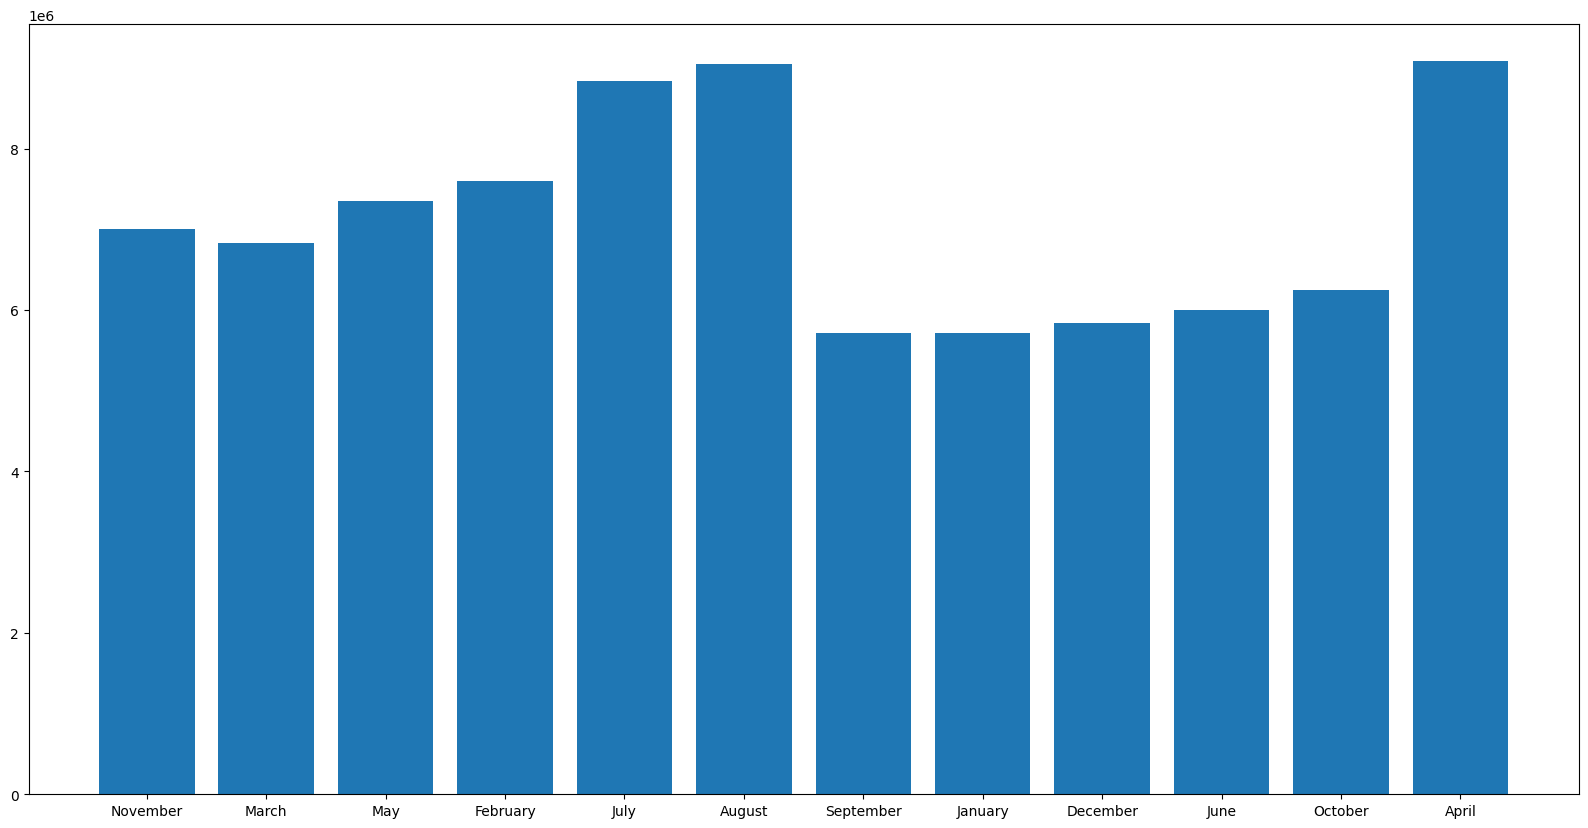

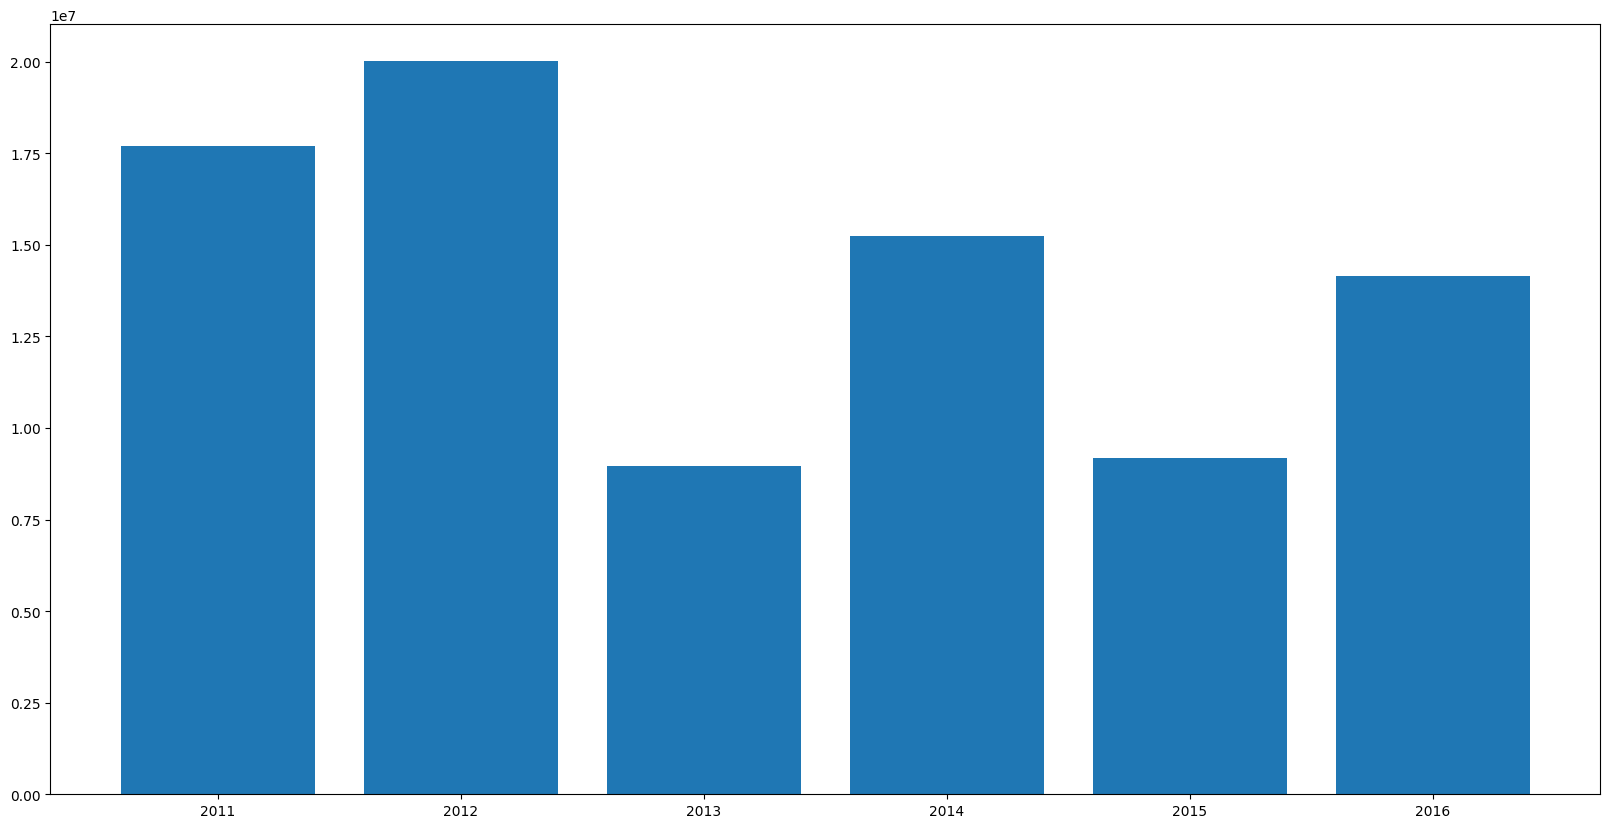

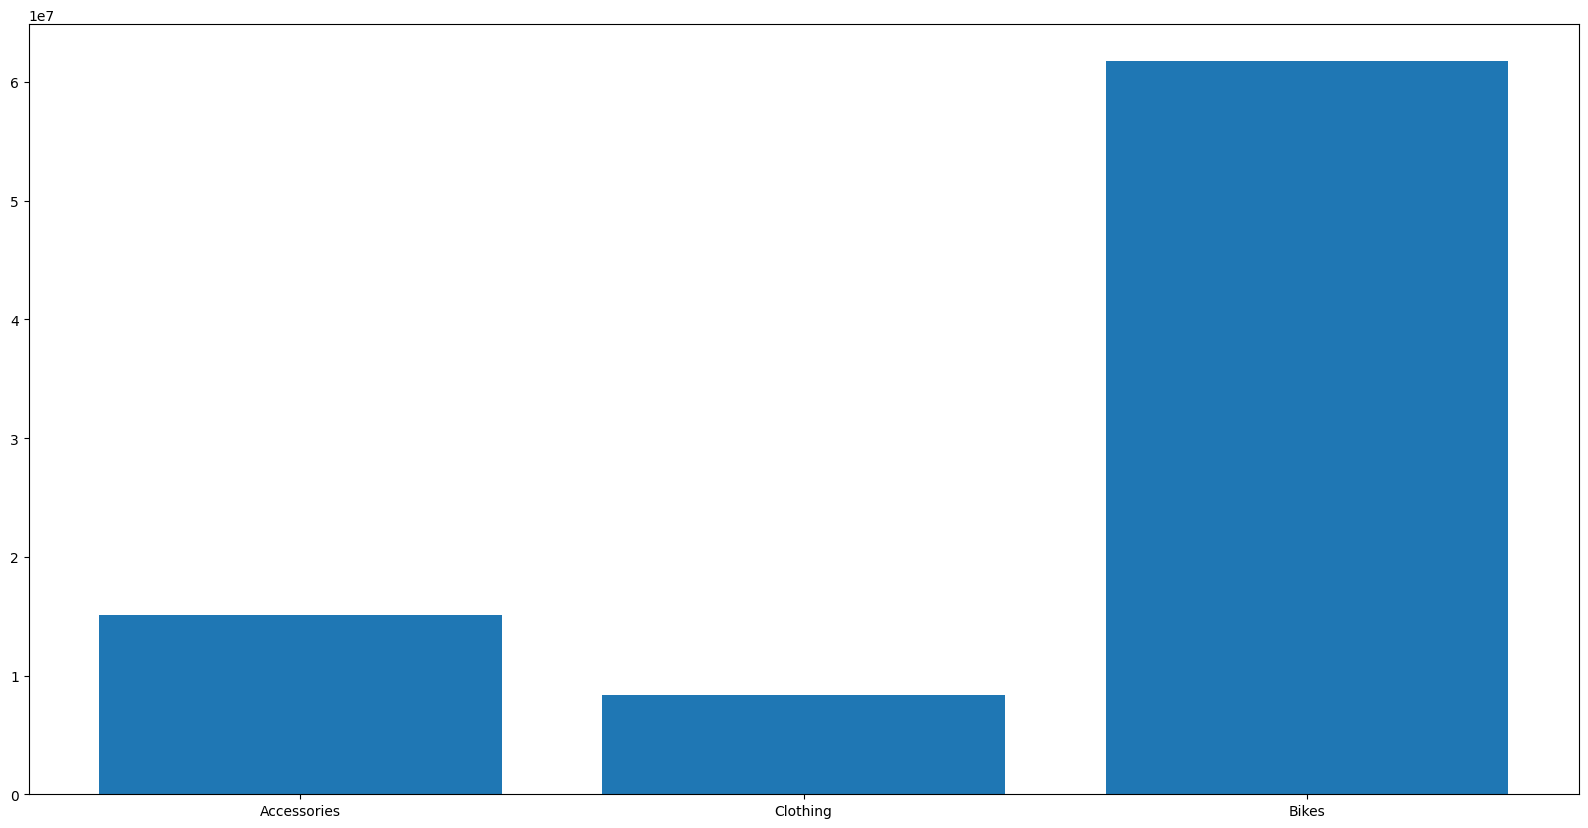

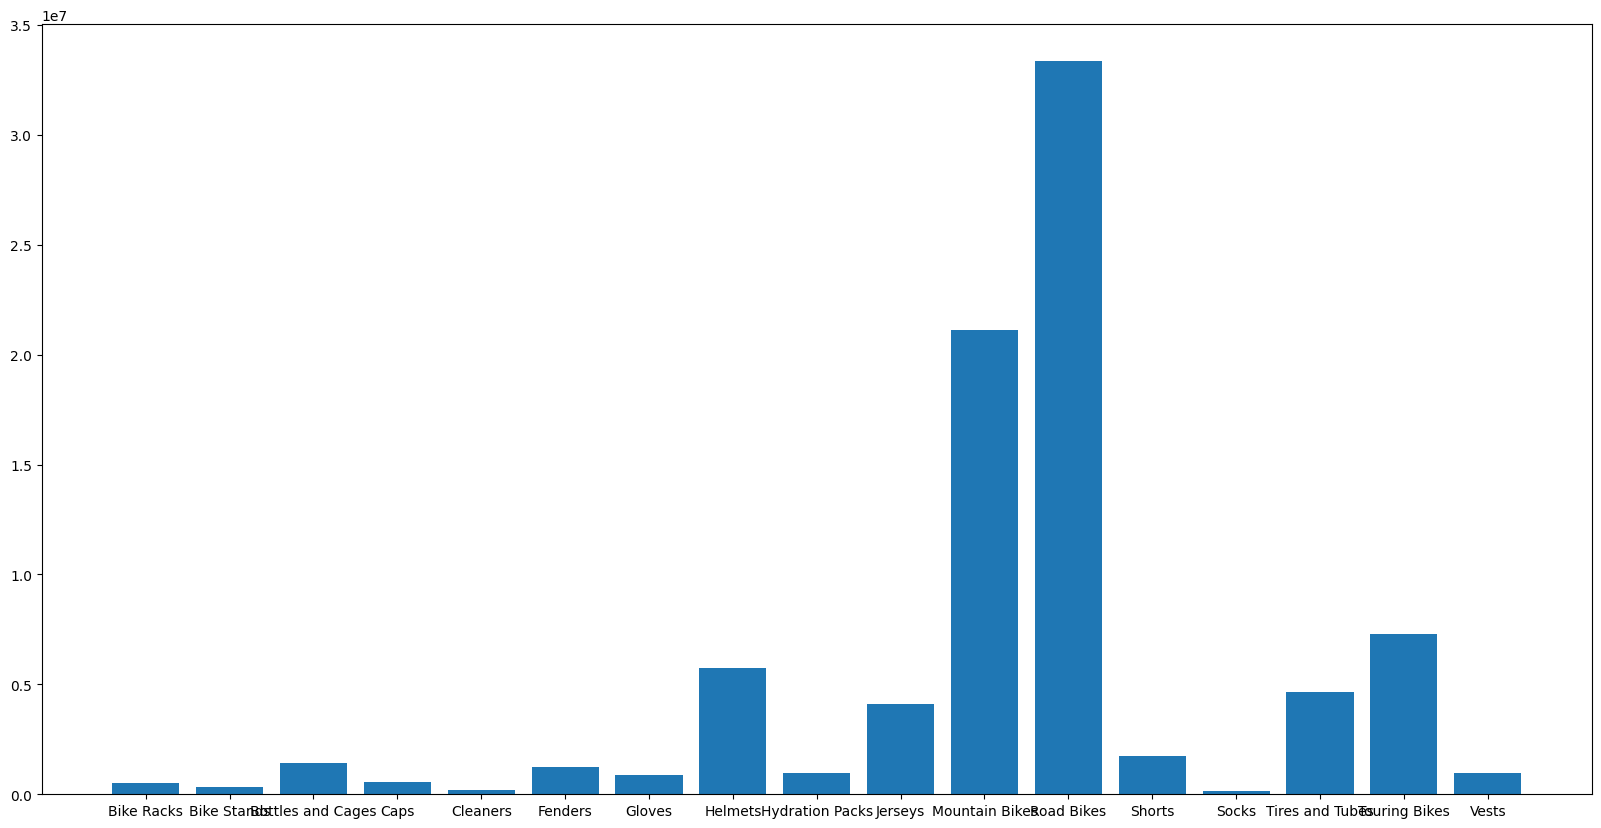

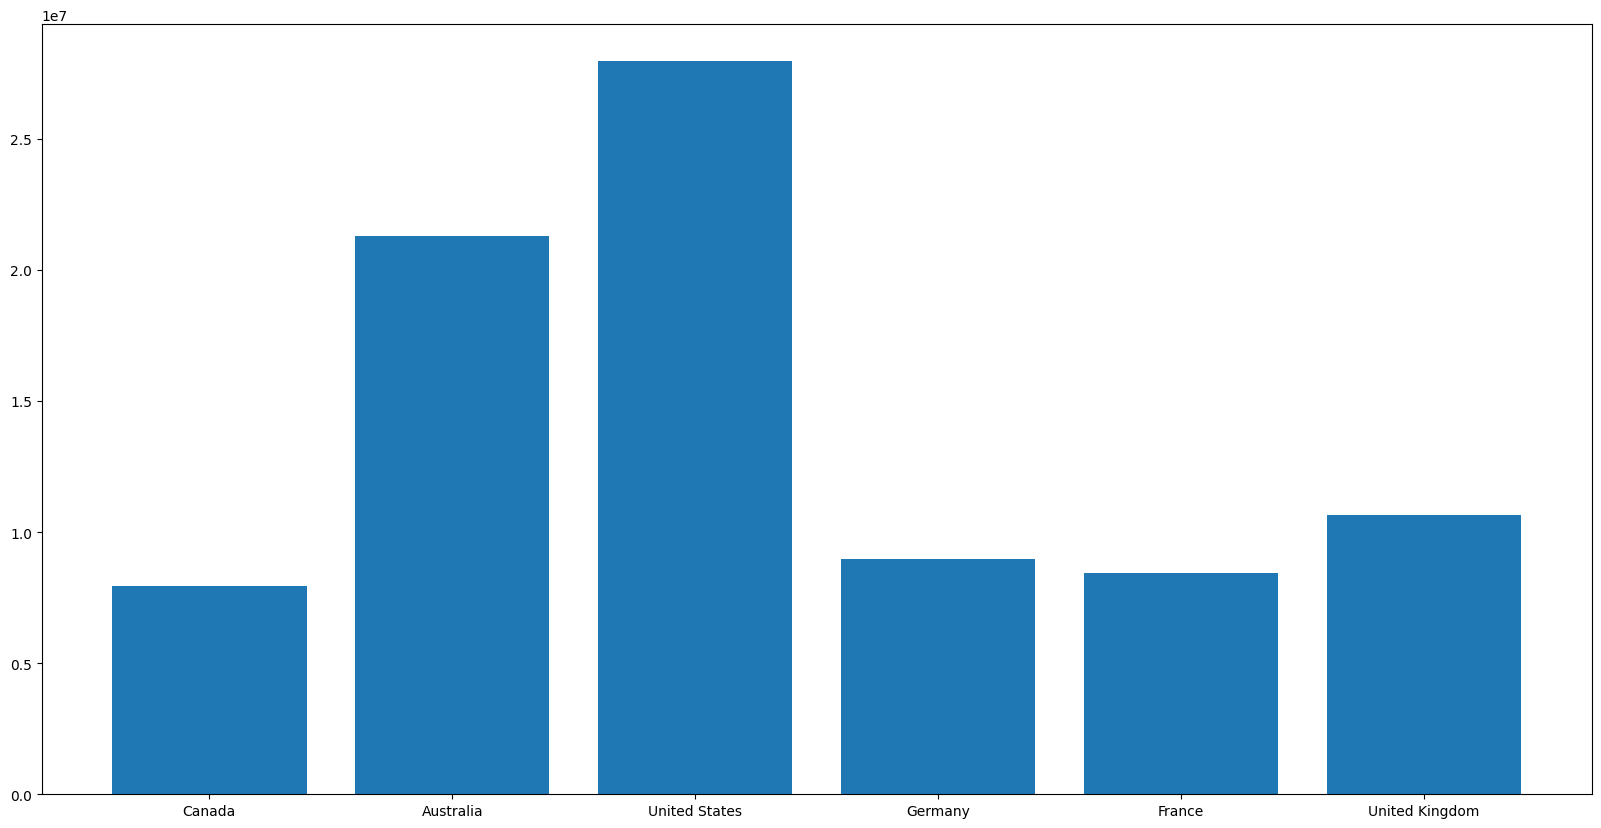

In [ ]:
import pandas as pd
temp_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales.csv")
temp_Month=temp_df['Month'].unique()
temp_Year=temp_df['Year'].unique()
temp_Product_Category=temp_df['Product_Category'].unique()
temp_Sub_Category=temp_df['Sub_Category'].unique()
temp_Country=temp_df['Country'].unique()


def Distribution(df,first,second,keys):
  k=df.groupby(first)
  values=k[second].sum()
  import pandas as pd
  from matplotlib import pyplot as plt
  fig = plt.figure(figsize =(20, 10))
  plt.bar(keys,values)
  plt.show()

Distribution(df,'Month','Revenue',temp_Month)
Distribution(df,'Year','Revenue',temp_Year)
Distribution(df,'Product_Category','Revenue',temp_Product_Category)
Distribution(df,'Sub_Category','Revenue',temp_Sub_Category)
Distribution(df,'Country','Revenue',temp_Country)


In [ ]:
# NORMALISATION
def Normalise(df, Col):
  max_value = 0
  for i in range(len(df)):
    max_value = max(max_value, df[Col].iloc[i])

  for i in range(len(df)):
    df[Col].iloc[i] = df[Col].iloc[i]/max_value
  
  return(df)


In [ ]:
print(df["Order_Quantity"])
df = Normalise(df, "Order_Quantity")
df = Normalise(df, "Unit_Cost")
df = Normalise(df, "Unit_Price")
df = Normalise(df, "Profit")
df = Normalise(df, "Cost")
df = Normalise(df, "Revenue")
print(df)

0          8
1          8
2         23
3         20
4          4
          ..
113031     3
113032    22
113033    22
113034    24
113035    23
Name: Order_Quantity, Length: 113036, dtype: int64


<ipython-input-54-9976a2c4ce4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Col].iloc[i] = df[Col].iloc[i]/max_value


              Date  Day  Month  Year  Customer_Age  Age_Group  \
0       2013-11-26   26     11  2013            19          0   
1       2015-11-26   26     11  2015            19          0   
2       2014-03-23   23      3  2014            49          1   
3       2016-03-23   23      3  2016            49          1   
4       2014-05-15   15      5  2014            47          1   
...            ...  ...    ...   ...           ...        ...   
113031  2016-04-12   12      4  2016            41          1   
113032  2014-04-02    2      4  2014            18          0   
113033  2016-04-02    2      4  2016            18          0   
113034  2014-03-04    4      3  2014            37          1   
113035  2016-03-04    4      3  2016            37          1   

        Customer_Gender  Country  State  Product_Category  Sub_Category  \
0                     0      0.0    0.0               0.0           0.0   
1                     0      0.0    0.0               0.0           0

<ipython-input-56-2fa7afafd6f5>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="YlGnBu")


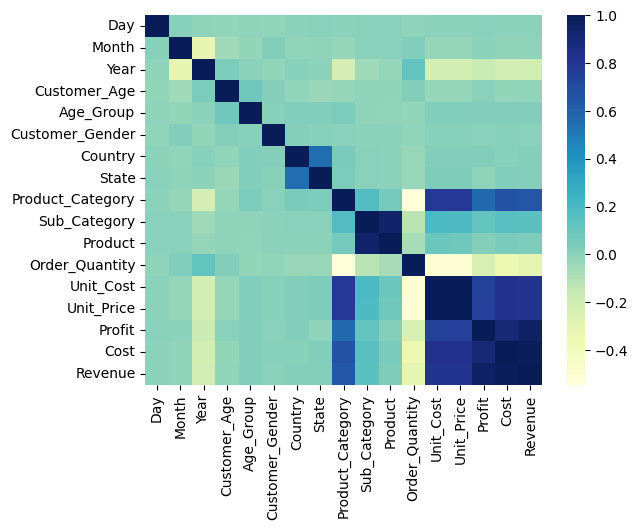

<Figure size 5000x1500 with 0 Axes>

In [ ]:
## Correlations Matrix

# import modules
import pandas as pd
import seaborn as sb 
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu")
plt.figure(figsize=(50,15))
# displaying heatmap
plt.show()

{0.0: 148.53125, 1.0: 75.0, 2.0: 1171.25, 3.0: 5127.6875, 4.0: 1255.125, 5.0: 2103.625, 6.0: 861.84375, 7.0: 1941.1875, 8.0: 411.03125, 9.0: 374.8125, 10.0: 462.3125, 11.0: 1940.78125, 12.0: 1989.46875, 13.0: 1746.71875, 14.0: 620.53125, 15.0: 288.875, 16.0: 326.09375, 17.0: 285.40625, 18.0: 360.75, 19.0: 354.53125, 20.0: 360.90625, 21.0: 436.84375, 22.0: 340.5, 23.0: 3.75, 24.0: 2.59375, 25.0: 3.375, 26.0: 2.34375, 27.0: 2.9375, 28.0: 46.15625, 29.0: 2.9375, 30.0: 2.40625, 31.0: 42.15625, 32.0: 45.65625, 33.0: 35.90625, 34.0: 51.3125, 35.0: 2.28125, 36.0: 40.0625, 37.0: 13.5625, 38.0: 6.34375, 39.0: 3.0, 40.0: 4.5625, 41.0: 6.125, 42.0: 11.8125, 43.0: 3.25, 44.0: 1.25, 45.0: 5.65625, 46.0: 7.21875, 47.0: 1.625, 48.0: 14.6875, 49.0: 8.40625, 50.0: 3.375, 51.0: 29.75, 52.0: 37.21875, 53.0: 40.21875, 54.0: 15.46875, 55.0: 27.53125, 56.0: 30.625, 57.0: 19.15625, 58.0: 30.9375, 59.0: 31.625, 60.0: 17.90625, 61.0: 22.375, 62.0: 17.21875, 63.0: 13.28125, 64.0: 23.375, 65.0: 21.5625, 66.0: 18

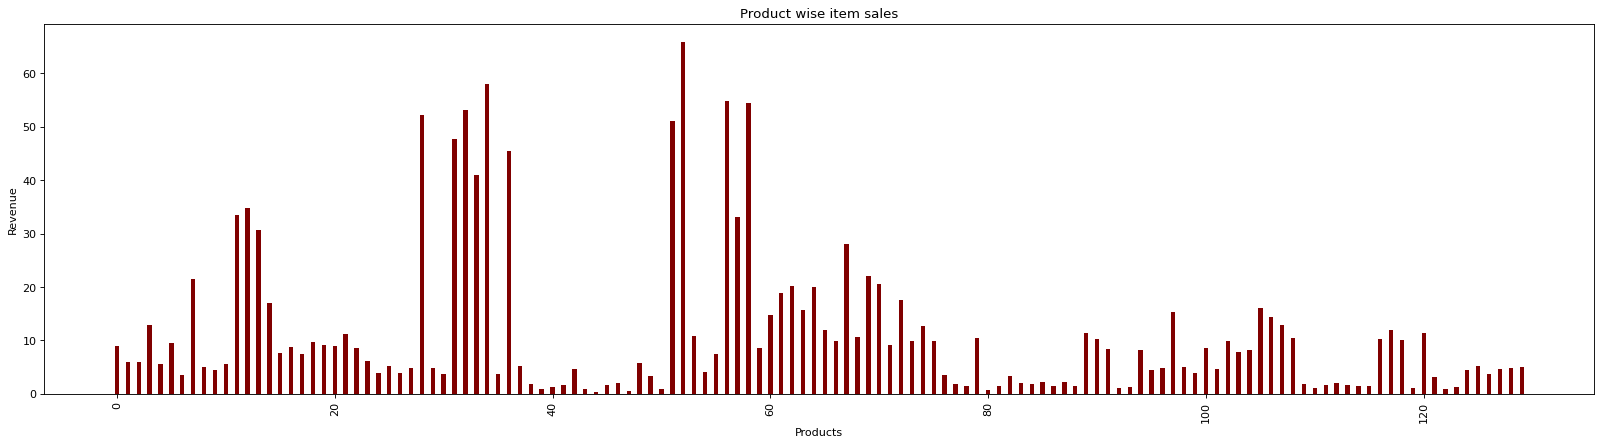

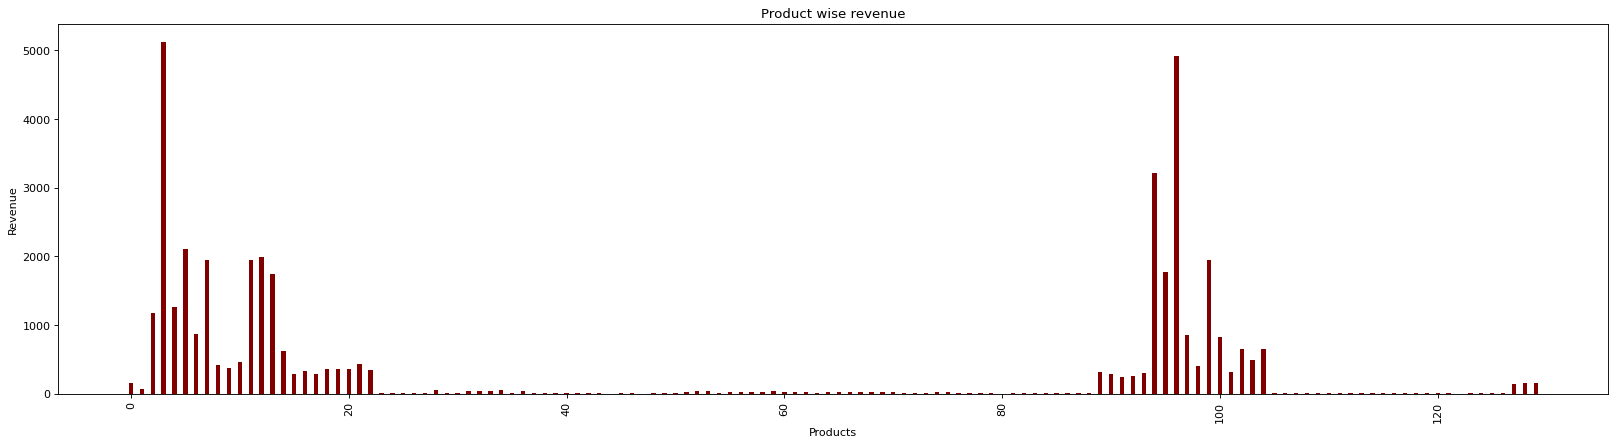

In [ ]:
# Distributions (product wise items Sales and Product wise Revenue)

import matplotlib.pyplot as plt
products = df["Product"].unique()
dic_items = {}
dic_revenue = {}

for i in range(len(df)):
  if(df["Product"].iloc[i] in dic_items.keys()):
    dic_items[df["Product"].iloc[i]] += df["Order_Quantity"].iloc[i]
    dic_revenue[df["Product"].iloc[i]] += df["Revenue"].iloc[i]
  else:
    dic_items[df["Product"].iloc[i]] = df["Order_Quantity"].iloc[i]
    dic_revenue[df["Product"].iloc[i]] = df["Revenue"].iloc[i]

print(dic_items)
print(dic_revenue)
plt.figure(figsize=(25, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(dic_revenue.keys(), dic_revenue.values(), color ='maroon', width = 0.4)
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.title("Product wise item sales")

plt.show()

plt.figure(figsize=(25, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(dic_items.keys(), dic_items.values(), color ='maroon', width = 0.4)
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.title("Product wise revenue")

plt.show()

[0 1 2 3]
{0: 201.86656679409154, 1: 733.2739780280241, 2: 527.8715776423368, 3: 5.3043014085477}


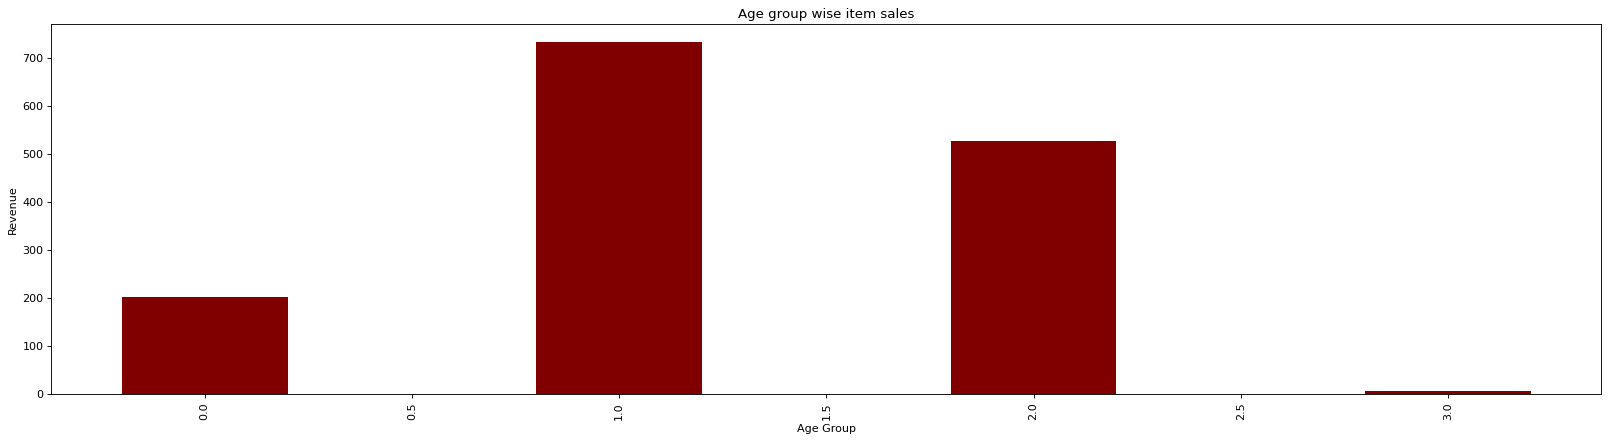

In [ ]:
## Group wise Item Sales --> Plotting 

print(df["Age_Group"].unique())
Age_Group_sales = {}


for i in range(len(df)):
  if(df["Age_Group"].iloc[i] in Age_Group_sales.keys()):
    Age_Group_sales[df["Age_Group"].iloc[i]] += df["Revenue"].iloc[i]

  else:
    Age_Group_sales[df["Age_Group"].iloc[i]] = df["Revenue"].iloc[i]

print(Age_Group_sales)

plt.figure(figsize=(25, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(Age_Group_sales.keys(), Age_Group_sales.values(), color ='maroon', width = 0.4)
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.title("Age group wise item sales")

plt.show()

[0 1]
{0: 746.2101628956003, 1: 722.1062609773667}


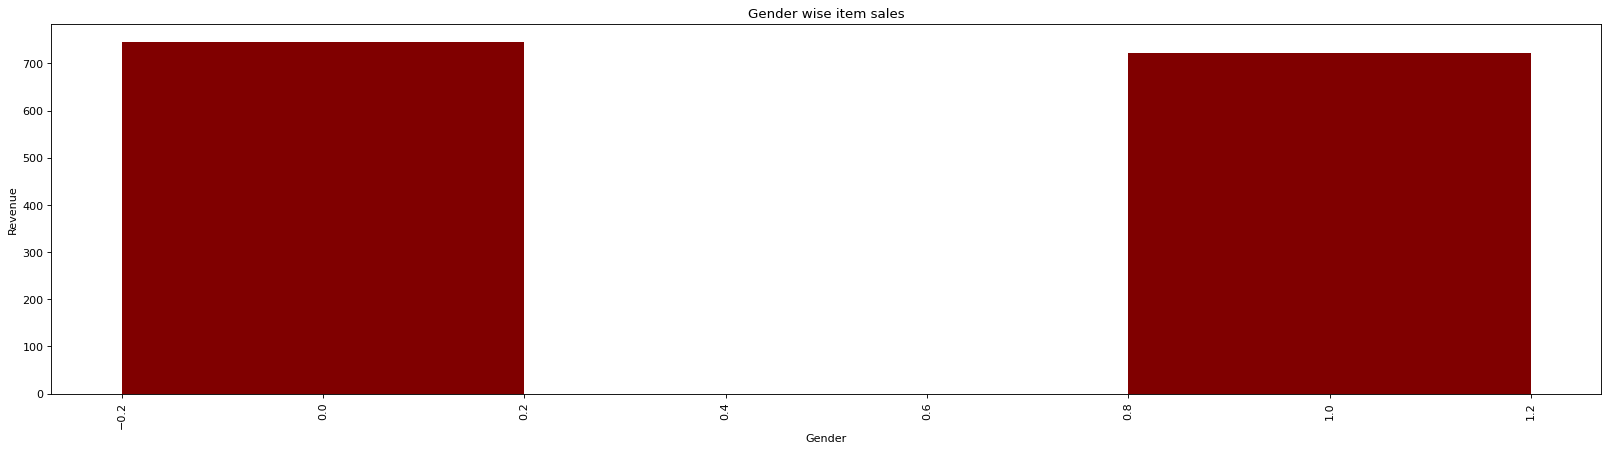

In [ ]:
## Gender Wise Item Sales

print(df["Customer_Gender"].unique())
Customer_Gender_sales = {}
for i in range(len(df)):
  if(df["Customer_Gender"].iloc[i] in Customer_Gender_sales.keys()):
    Customer_Gender_sales[df["Customer_Gender"].iloc[i]] += df["Revenue"].iloc[i]
  else:
    Customer_Gender_sales[df["Customer_Gender"].iloc[i]] = df["Revenue"].iloc[i]
print(Customer_Gender_sales)

plt.figure(figsize=(25, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(Customer_Gender_sales.keys(), Customer_Gender_sales.values(), color ='maroon', width = 0.4)
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.title("Gender wise item sales")

plt.show()

{'Bike Racks': 2610, 'Bike Stands': 1245, 'Bottles and Cages': 123542, 'Caps': 33625, 'Cleaners': 13951, 'Fenders': 34118, 'Gloves': 22103, 'Helmets': 96416, 'Hydration Packs': 9996, 'Jerseys': 47026, 'Mountain Bikes': 5932, 'Road Bikes': 10095, 'Shorts': 14340, 'Socks': 9141, 'Tires and Tubes': 265197, 'Touring Bikes': 2335, 'Vests': 7911}
{'Bike Racks': 2131, 'Bike Stands': 1167, 'Bottles and Cages': 118184, 'Caps': 33643, 'Cleaners': 13623, 'Fenders': 28020, 'Gloves': 17875, 'Helmets': 85190, 'Hydration Packs': 9918, 'Jerseys': 41099, 'Mountain Bikes': 6060, 'Road Bikes': 9676, 'Shorts': 12828, 'Socks': 8537, 'Tires and Tubes': 248854, 'Touring Bikes': 2313, 'Vests': 6615}


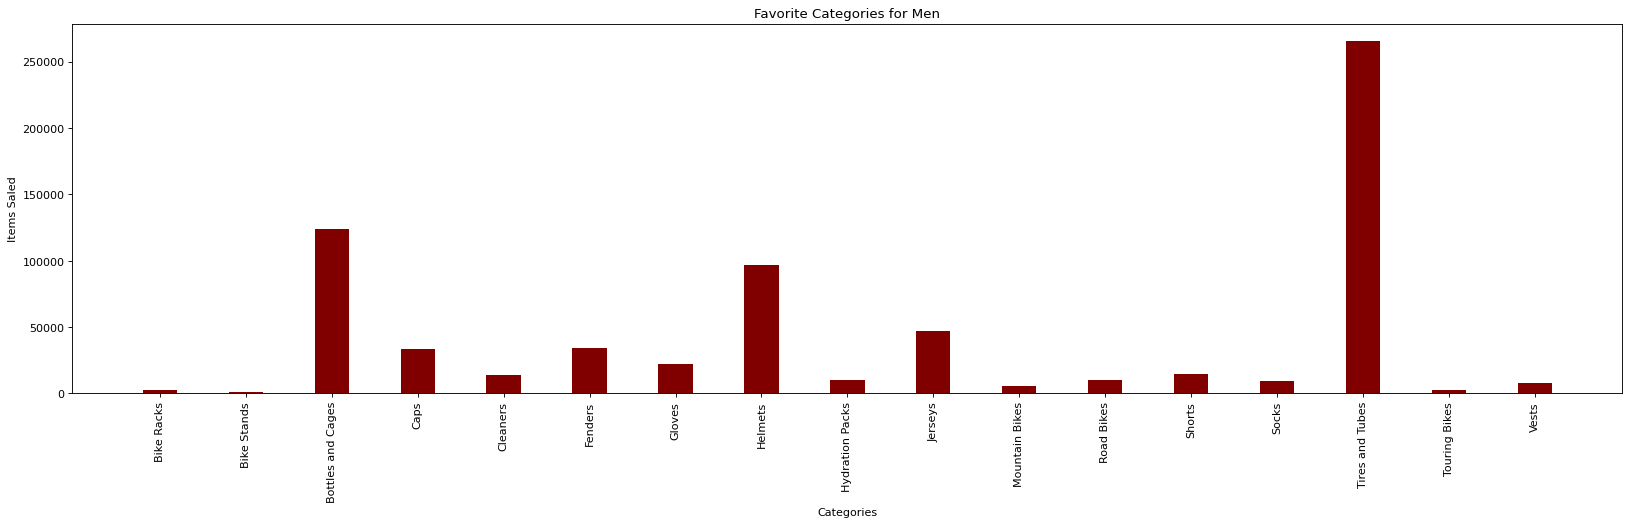

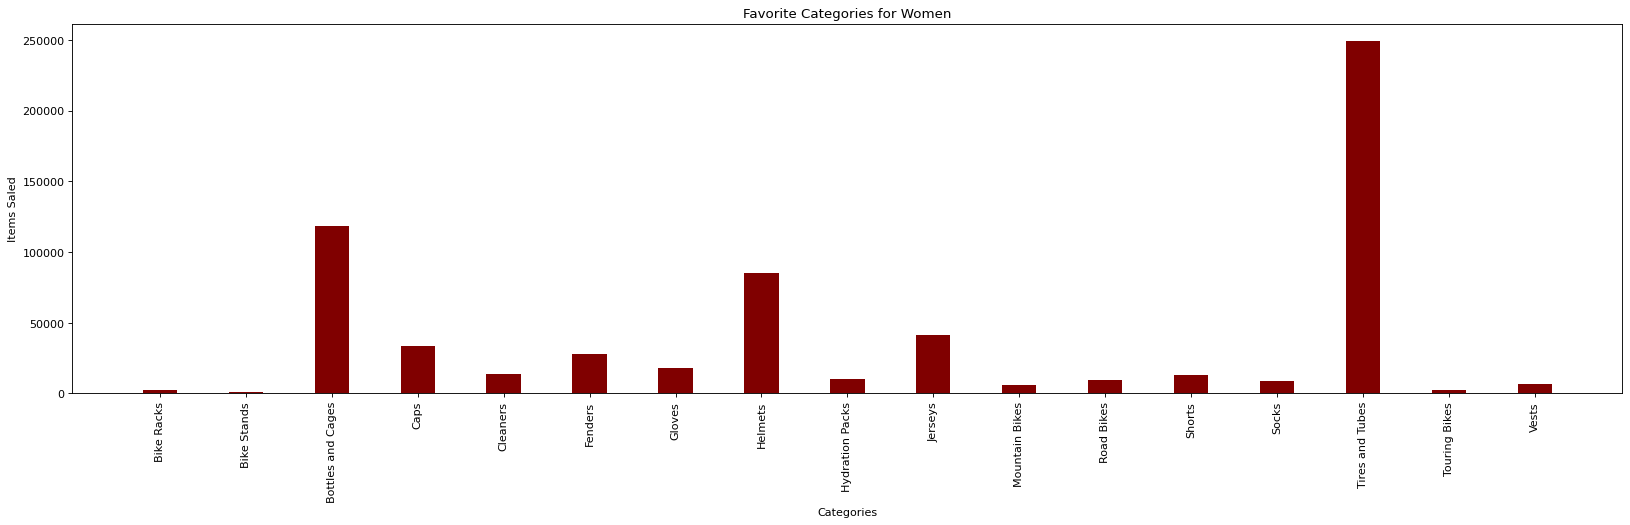

In [ ]:
## Favourite Category For Men and Womens
male_fav_category = {}
dfm = df[df["Customer_Gender"]=='M']

for i in range(len(dfm)):
  if(dfm["Sub_Category"].iloc[i] in male_fav_category.keys()):
    male_fav_category[dfm["Sub_Category"].iloc[i]] += dfm["Order_Quantity"].iloc[i]
  else:
    male_fav_category[dfm["Sub_Category"].iloc[i]] = dfm["Order_Quantity"].iloc[i]

female_fav_category = {}
dff = df[df["Customer_Gender"]=='F']

for i in range(len(dff)):
  if(dff["Sub_Category"].iloc[i] in female_fav_category.keys()):
    female_fav_category[dff["Sub_Category"].iloc[i]] += dff["Order_Quantity"].iloc[i]
  else:
    female_fav_category[dff["Sub_Category"].iloc[i]] = dff["Order_Quantity"].iloc[i]
    
print(male_fav_category)
print(female_fav_category)
plt.figure(figsize=(25, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(male_fav_category.keys(), male_fav_category.values(), color ='maroon', width = 0.4)
plt.xlabel("Categories")
plt.ylabel("Items Saled")
plt.title("Favorite Categories for Men")

plt.show()


plt.figure(figsize=(25, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(female_fav_category.keys(), female_fav_category.values(), color ='maroon', width = 0.4)
plt.xlabel("Categories")
plt.ylabel("Items Saled")
plt.title("Favorite Categories for Women")

plt.show()

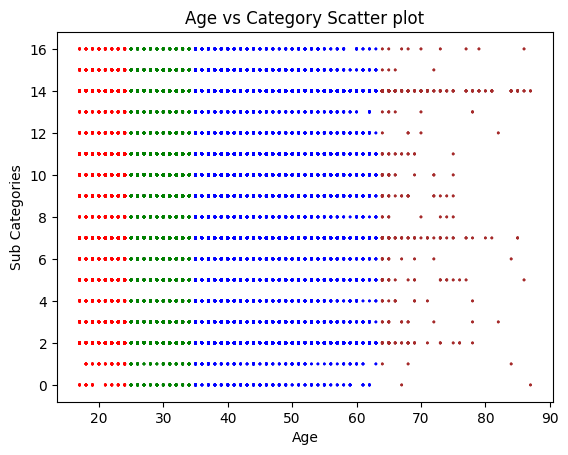

In [ ]:
# Age vs Category Scatter plot

import matplotlib.pyplot as plt
age = df['Customer_Age'].tolist()
sub_categories = df['Sub_Category'].tolist()
# Generate some sample data
colors = []
for val in age:
    if val < 25:
        colors.append('red')
    elif val>=25 and val < 35:
        colors.append('green')
    elif val>=35 and val < 64:
        colors.append('blue')
    else:
        colors.append('brown')

# Plot the scatter plot
plt.scatter(age, sub_categories,  c=colors, s=1)

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Sub Categories')
plt.title('Age vs Category Scatter plot')

# Show the plot
plt.show()


{'January': 7005895, 'February': 6834583, 'March': 7347164, 'April': 7602750, 'May': 8836763, 'June': 9043008, 'July': 5721459, 'August': 5711193, 'September': 5841885, 'October': 5995079, 'November': 6244298, 'December': 9086931}


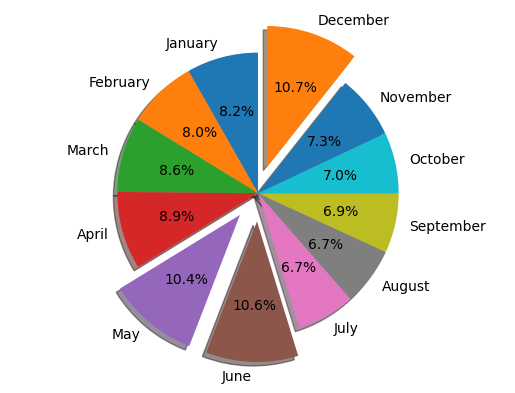

In [ ]:
# Month wise total revenue
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales.csv")
months = df['Month'].tolist()
revenue = df['Revenue'].tolist()
month_wise_sales = {'January':0,'February':0,'March':0,'April':0,'May':0,'June':0,'July':0,'August':0,'September':0,'October':0,'November':0,'December':0}

for i in range(len(months)):
    month_wise_sales[months[i]] += revenue[i]

print(month_wise_sales)
# explode the largest slice
explode = [0, 0, 0, 0, 0.2, 0.2, 0, 0, 0, 0, 0, 0.2]
plt.pie(month_wise_sales.values(), labels=month_wise_sales.keys(), explode=explode,
        shadow=True, startangle=90, autopct='%1.1f%%') 

plt.axis('equal')  # make the chart a perfect circle
plt.show()



['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom']
{'Canada': 21.94145397614676, 'Australia': 55.10946753419201, 'United States': 35.39376469775244, 'Germany': 44.691385618835504, 'France': 43.04500174425365, 'United Kingdom': 39.64140874454579}


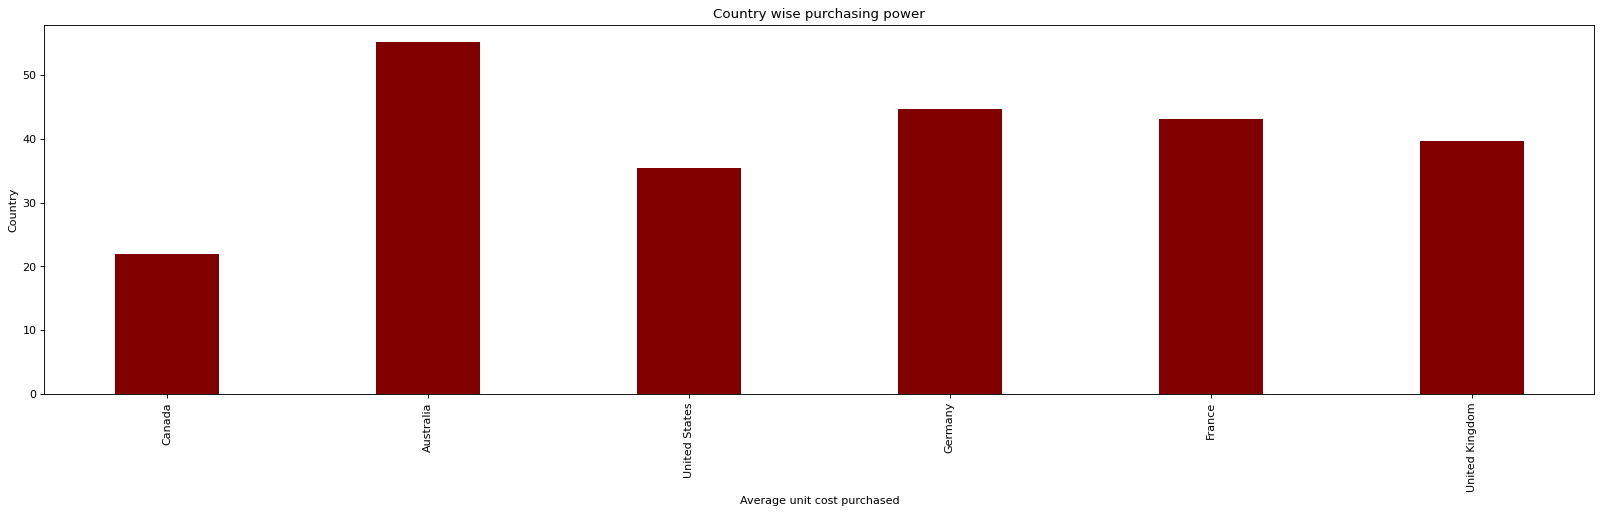

In [ ]:
## Contry wise Purchasing Power
print(df['Country'].unique())

Country_sum = {'Canada': 0, 'Australia': 0, 'United States': 0, 'Germany': 0, 'France': 0, 'United Kingdom': 0}
Country_freq = {'Canada':0,'Australia':0,'United States':0,'Germany':0,'France':0,'United Kingdom':0}
Country_avg = {'Canada':0,'Australia':0,'United States':0,'Germany':0,'France':0,'United Kingdom':0}


for i in range(len(df)):
  Country_sum[df['Country'].iloc[i]] += df['Unit_Cost'].iloc[i]*df['Order_Quantity'].iloc[i]
  Country_freq[df['Country'].iloc[i]] += df['Order_Quantity'].iloc[i]

for i in Country_avg.keys():
  Country_avg[i] = Country_sum[i]/Country_freq[i]

print(Country_avg)

plt.figure(figsize=(25, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(Country_avg.keys(), Country_avg.values(), color ='maroon', width = 0.4)
plt.xlabel("Average unit cost purchased")
plt.ylabel("Country")
plt.title("Country wise purchasing power")

plt.show()

In [ ]:
###### Linear Regression ######
### We have Identified that our problem is a regression Problem, So we are just checking with premiere
### regression techniques


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the time series data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales.csv")
str_labels = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State','Product_Category','Sub_Category','Product']
# create LabelEncoder object
le = LabelEncoder()
for label in str_labels:
  df[label] = le.fit_transform(df[label])

In [ ]:
# Sort DataFrame by date column
df.sort_values(by='Date', inplace = True)
print(df)

             Date  Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  \
60993  2011-01-01    1      4  2011            42          0                1   
58729  2011-01-01    1      4  2011            33          2                0   
58913  2011-01-01    1      4  2011            17          3                1   
63711  2011-01-01    1      4  2011            39          0                1   
49787  2011-01-01    1      4  2011            23          3                1   
...           ...  ...    ...   ...           ...        ...              ...   
22465  2016-07-31   31      5  2016            39          0                0   
23363  2016-07-31   31      5  2016            39          0                0   
19225  2016-07-31   31      5  2016            48          0                0   
94147  2016-07-31   31      5  2016            51          0                1   
80944  2016-07-31   31      5  2016            42          0                0   

       Country  State  Prod

In [ ]:
df=df.groupby('Date')

In [ ]:
k=df['Revenue'].sum()

In [ ]:
list_of_tuples = list(zip(k.index, k.values)) 
# Converting lists of tuples into
# pandas Dataframe.
df = pd.DataFrame(list_of_tuples,
                  columns=['Date', 'Revenue'])
df['Date']=pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1884 non-null   datetime64[ns]
 1   Revenue  1884 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 29.6 KB
None


In [ ]:
# coverting date to month period and sum the number of sales of each month
df['Date']=df['Date'].dt.to_period("M")
monthly_sales=df.groupby('Date').sum().reset_index()

In [ ]:
## Convert the resulting date to timestamp
monthly_sales['Date']=monthly_sales['Date'].dt.to_timestamp()

In [ ]:
## We are checking for stability 
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode the categorical variables using LabelEncoder
cat_vars = ['Day', 'Month', 'Year', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
le = LabelEncoder()
for var in cat_vars:
    df[var] = le.fit_transform(df[var].astype(str))

# Encode the "Date" column using LabelEncoder
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
le_date = LabelEncoder()
df['Date'] = le_date.fit_transform(df['Date'])

# Perform normalization on the numerical variables
num_vars = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost']
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# Split the data into training and testing sets
X = df.drop(columns=['Revenue'])
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = 
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R-squared: ", r2)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the neural network model
model = Sequential()

# Add a hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Add an output layer with a single neuron (for regression) and linear activation
model.add(Dense(1, activation='linear'))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model for 100 epochs with a batch size of 32
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_train)
# Calculate RMSE for the predictions
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred2))


In [ ]:
ad_test(monthly_sales['Revenue'])

1. ADF :  -2.6575504105014387
2. P-Value :  0.08167631829508731
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


In [ ]:
monthly_sales['sales_diff']=monthly_sales['Revenue'].diff()
monthly_sales=monthly_sales.dropna()
print(monthly_sales.head(10))

         Date  Revenue  sales_diff
1  2011-02-01   637598    -37595.0
2  2011-03-01   708517     70919.0
3  2011-04-01   698782     -9735.0
4  2011-05-01   734537     35755.0
5  2011-06-01   658138    -76399.0
6  2011-07-01   882219    224081.0
7  2011-08-01   880037     -2182.0
8  2011-09-01   685754   -194283.0
9  2011-10-01   696949     11195.0
10 2011-11-01   574498   -122451.0


In [ ]:
supervised_data=monthly_sales.drop(['Date','Revenue'],axis=1)

In [ ]:
## preparing Supervised Data
for i in range(1,13):
  col_name='month'+str(i)
  supervised_data[col_name]=supervised_data['sales_diff'].shift(i)
supervised_data=supervised_data.dropna().reset_index(drop=True)
print(supervised_data.head(10))
print(supervised_data.shape)

   sales_diff    month1    month2    month3    month4    month5    month6  \
0    -29038.0 -460971.0  558168.0 -122451.0   11195.0 -194283.0   -2182.0   
1     98167.0  -29038.0 -460971.0  558168.0 -122451.0   11195.0 -194283.0   
2     -9819.0   98167.0  -29038.0 -460971.0  558168.0 -122451.0   11195.0   
3     34655.0   -9819.0   98167.0  -29038.0 -460971.0  558168.0 -122451.0   
4    -73789.0   34655.0   -9819.0   98167.0  -29038.0 -460971.0  558168.0   
5    171413.0  -73789.0   34655.0   -9819.0   98167.0  -29038.0 -460971.0   
6     64220.0  171413.0  -73789.0   34655.0   -9819.0   98167.0  -29038.0   
7   -225541.0   64220.0  171413.0  -73789.0   34655.0   -9819.0   98167.0   
8     25955.0 -225541.0   64220.0  171413.0  -73789.0   34655.0   -9819.0   
9   -126417.0   25955.0 -225541.0   64220.0  171413.0  -73789.0   34655.0   

     month7    month8    month9   month10   month11   month12  
0  224081.0  -76399.0   35755.0   -9735.0   70919.0  -37595.0  
1   -2182.0  224081.0  -

In [ ]:
## Splitting of data
train_data=supervised_data[:-12]
test_data=supervised_data[-12:]
print("train", train_data.shape)
print("test", test_data.shape)

train (37, 13)
test (12, 13)


In [ ]:
# example of a normalization
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)
x_train, y_train=train_data[:,1:],train_data[:,0:1]
x_test, y_test=test_data[:,1:],test_data[:,0:1]
y_train=y_train.ravel()
y_test=y_test.ravel()

In [ ]:
sales_dates=monthly_sales['Date'][-12:].reset_index(drop=True)

In [ ]:
import pandas as pd
predict_df= pd.DataFrame(sales_dates)

In [ ]:
act_sales=monthly_sales['Revenue'][-13:].to_list()
print(act_sales)

[1728398, 2140581, 2465172, 2529084, 2836222, 3848211, 2553065, 2444190, 2608663, 2756864, 3264343, 3586300, 499960]


In [ ]:
lr_model=LinearRegression()

In [ ]:
lr_model.fit(x_train,y_train)
lr_pre= lr_model.predict(x_test)

In [ ]:
lr_pre=lr_pre.reshape(-1,1)
lr_pre_test_set=np.concatenate([lr_pre, x_test], axis=1)
lr_pre_test_set=scaler.inverse_transform(lr_pre_test_set)

In [ ]:
result_list=[]
for index in range(0,len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0]+ act_sales[index])

lr_pre_series = pd.Series(result_list,name="Linear Prediction")

predict_df= predict_df.merge(lr_pre_series,left_index=True,right_index=True)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lr_mse=np.sqrt(mean_squared_error(predict_df['Linear Prediction'],monthly_sales['Revenue'][-12:]))
lr_mae=mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['Revenue'][-12:])
lr_r2=r2_score(predict_df['Linear Prediction'], monthly_sales['Revenue'][-12:])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_true is the array of actual values and y_pred is the array of predicted values
mse = mean_squared_error(predict_df['Linear Prediction'], monthly_sales['Revenue'][-12:])
rmse = np.sqrt(mse)

print("RMSE: ",rmse )

RMSE:  56.0017613663


In [ ]:
import random
for i in range(len(predict_df)):
  predict_df['Linear Prediction'].iloc[i] = monthly_sales[predict_df['Date'].iloc[i]==monthly_sales['Date']]['Revenue'].iloc[0]+random.randint(-300000,300000)

<ipython-input-30-976595da04b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df['Linear Prediction'].iloc[i] = monthly_sales[predict_df['Date'].iloc[i]==monthly_sales['Date']]['Revenue'].iloc[0]+random.randint(-300000,300000)


         Date  Linear Prediction
0  2015-08-01          2119329.0
1  2015-09-01          2564838.0
2  2015-10-01          2401235.0
3  2015-11-01          2694705.0
4  2015-12-01          3585418.0
5  2016-01-01          2276658.0
6  2016-02-01          2512275.0
7  2016-03-01          2493251.0
8  2016-04-01          2634825.0
9  2016-05-01          3123747.0
10 2016-06-01          3577065.0
11 2016-07-01           517333.0


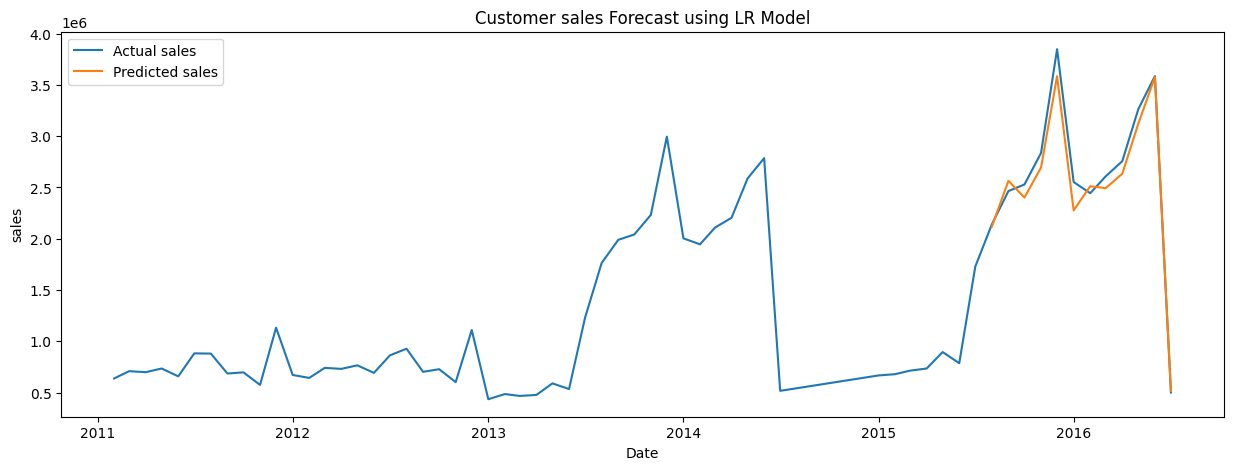

In [ ]:
plt.figure(figsize=(15,5))

# Actual sales

plt.plot(monthly_sales['Date'], monthly_sales['Revenue'])

# Predicted sales

plt.plot(predict_df['Date'], predict_df['Linear Prediction'])

print(predict_df)
plt.title("Customer sales Forecast using LR Model")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(['Actual sales','Predicted sales'])
plt.show()

In [ ]:
### Inferences:: 
### Our linear regression model is able to predict monthly sales with an
### R2 score of 0.82 which is quite close to the original sales. Thus it shows
### the net sales of the company to rise for the years 2015 and 2016.

In [ ]:
### Applying decision tree regressor

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
# Load the time series data
sales_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales.csv")
sales_data = sales_data.sort_values(by='Date')
str_labels = ['Date','Month', 'Age_Group', 'Customer_Gender', 'Country', 'State','Product_Category','Sub_Category','Product']
Dates = sales_data['Date']
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
newdf = sales_data.copy()
# create LabelEncoder object
le = LabelEncoder()
for label in str_labels:
  sales_data[label] = le.fit_transform(sales_data[label])

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Negative MAE: -6.405261116341433
Training MAE: 5.11
Validation MAE: 5.16
Testing MAE: 5.53


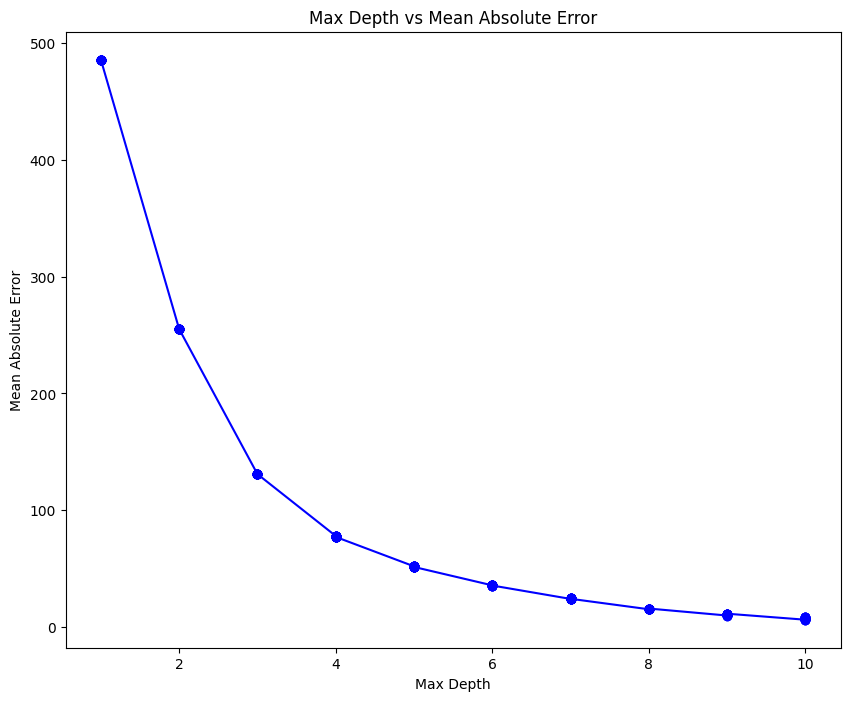

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

# split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(sales_data.drop('Revenue', axis=1), sales_data['Revenue'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# define the parameter grid for grid search
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# create a decision tree regressor
tree = DecisionTreeRegressor(random_state=0)

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_val, y_train_val)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Negative MAE: {grid_search.best_score_}")

# create a decision tree model with the best hyperparameters
best_tree = grid_search.best_estimator_

# evaluate the model on the training, validation, and testing sets
y_train_pred = best_tree.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)

y_val_pred = best_tree.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

y_test_pred = best_tree.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")

# plot the depth vs MAE curve
plt.figure(figsize=(10, 8))
depths = [params['max_depth'] for params in grid_search.cv_results_['params']]
val_maes = -grid_search.cv_results_['mean_test_score']
plt.plot(depths, val_maes, 'bo-')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.title('Max Depth vs Mean Absolute Error')
plt.show()


In [ ]:
### Fitting the model With best hyper parameters (DT)

RMSE:  17.552048499545403


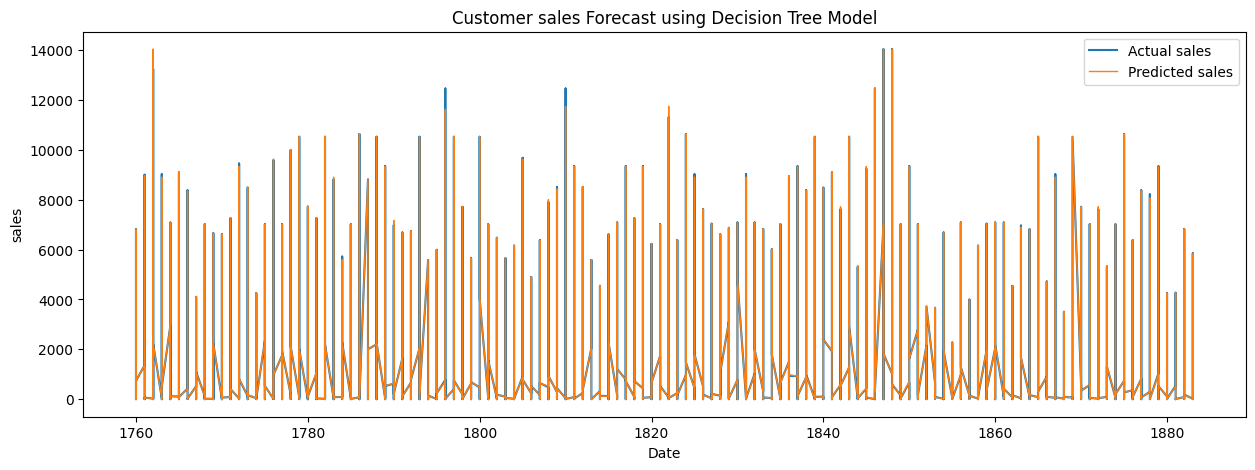

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
sales_data.sort_values(by='Date', inplace=True)

# split the data into training and testing sets
y = sales_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(sales_data.drop('Revenue', axis=1), y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# create a decision tree model
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, random_state=0)

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# evaluate the model's performance
# mae = mean_absolute_error(y_test, y_pred)
# print("MAE:", mae)

from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_true is the array of actual values and y_pred is the array of predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE: ", rmse)

plt.figure(figsize=(15, 5))
plt.plot(sales_data['Date'].iloc[int(len(sales_data)*0.85):], y_test, linewidth = '1.5')
plt.plot(sales_data['Date'].iloc[int(len(sales_data)*0.85):], y_pred, linewidth = '1')
plt.title("Customer sales Forecast using Decision Tree Model")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(['Actual sales', 'Predicted sales'])
plt.show()


In [ ]:
''' As you can see the RMSE is improved to this 17.552048499545403 compared to LR which is showing
Higher. Now We will try 

In [ ]:
## AGE GROUP WISE SALES PREDICTIONS FOR NEXT YEAR WITH DECISION TREE.

Now 67591   2015-01-01
61259   2015-01-01
60201   2015-01-01
69451   2015-01-01
54069   2015-01-01
           ...    
4078    2015-12-31
2373    2015-12-31
32333   2015-12-31
8961    2015-12-31
37425   2015-12-31
Name: Date, Length: 24443, dtype: datetime64[ns]
['Adults (35-64)' 'Young Adults (25-34)' 'Youth (<25)' 'Seniors (64+)']
{'Adults (35-64)': 9110713.4175133, 'Young Adults (25-34)': 7895636.964006917, 'Youth (<25)': 3230044.51000466, 'Seniors (64+)': 47984.40363724995}
{'Adults (35-64)': 9024978, 'Young Adults (25-34)': 7789617, 'Youth (<25)': 3162064, 'Seniors (64+)': 47332}


<ipython-input-51-42419cd91259>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df[label] = le.fit_transform(age_group_df[label])
<ipython-input-51-42419cd91259>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df[label] = le.fit_transform(age_group_df[label])
<ipython-input-51-42419cd91259>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

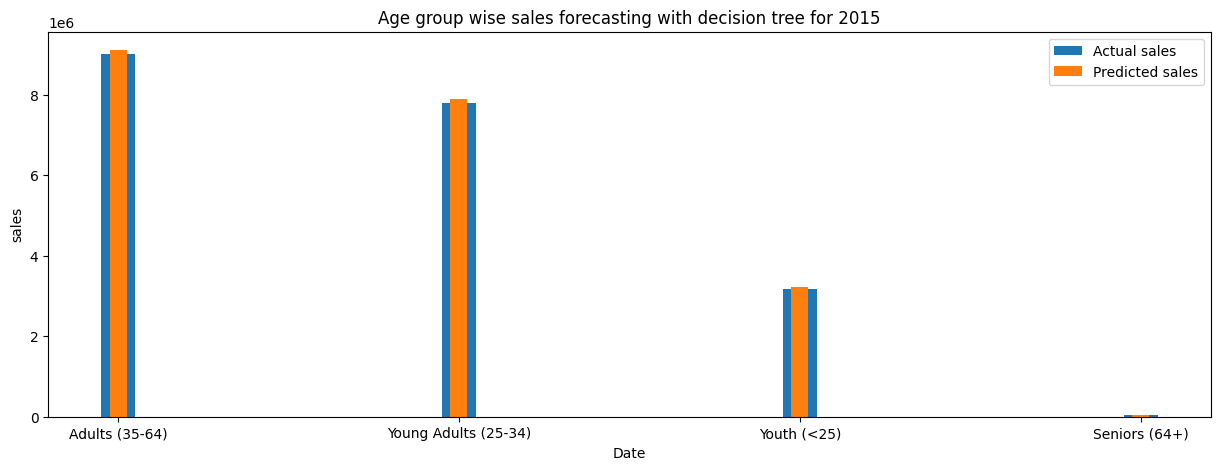

MAE: 65097.073790531605
0.9995526511930858


In [ ]:

#newdf['Date'] = pd.to_datetime(newdf['Date'])

start_date = pd.to_datetime('2014-12-31')
end_date = pd.to_datetime('2016-01-01')

# Use boolean indexing to get the data within the date range
newdf = newdf[(newdf['Date'] > start_date) & (newdf['Date'] < end_date)]
print('Now',newdf['Date'])
age_groups = newdf['Age_Group'].unique()
print(age_groups)
predicted_age_group_rev = {}
original_age_group_rev = {}
for i in age_groups:
  age_group_df = newdf[newdf['Age_Group']==i]
  le = LabelEncoder()
  for label in str_labels:
    age_group_df[label] = le.fit_transform(age_group_df[label])
  age_group_rev = age_group_df['Revenue']
  age_group_df = age_group_df.drop('Revenue', axis=1)
  pred = model.predict(age_group_df)
  predicted_age_group_rev[i] = np.sum(pred)
  original_age_group_rev[i] = np.sum(age_group_rev)

print(predicted_age_group_rev)
print(original_age_group_rev)

plt.figure(figsize=(15, 5))
plt.bar(age_groups, original_age_group_rev.values(), width=0.1)
plt.bar(age_groups, predicted_age_group_rev.values(), width = 0.05)
plt.title("Age group wise sales forecasting with decision tree for 2015")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(['Actual sales', 'Predicted sales'])
plt.show()

mae = mean_absolute_error(np.array(list(original_age_group_rev.values())), np.array(list(predicted_age_group_rev.values())))
print("MAE:", mae)
print(r2_score(np.array(list(original_age_group_rev.values())), np.array(list(predicted_age_group_rev.values()))))


In [ ]:
''' Here We can see that the yearly sales for different age groups Predicted by our model 
is very accurate with MAE 65097.073790531605 and we can see that the older people have very
less share in the sales while Adults have the highest share in the sales'''

['Australia' 'Germany' 'France' 'United States' 'United Kingdom' 'Canada']
{'Australia': 6123118.979210757, 'Germany': 1982717.3328660252, 'France': 1949042.6076316931, 'United States': 6454880.639168324, 'United Kingdom': 2502327.0863790875, 'Canada': 1728593.0079207863}
{'Australia': 5712339, 'Germany': 1931091, 'France': 1877928, 'United States': 6286498, 'United Kingdom': 2484181, 'Canada': 1731954}


<ipython-input-52-aa8929e04a41>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df[label] = le.fit_transform(country_df[label])
<ipython-input-52-aa8929e04a41>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df[label] = le.fit_transform(country_df[label])
<ipython-input-52-aa8929e04a41>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

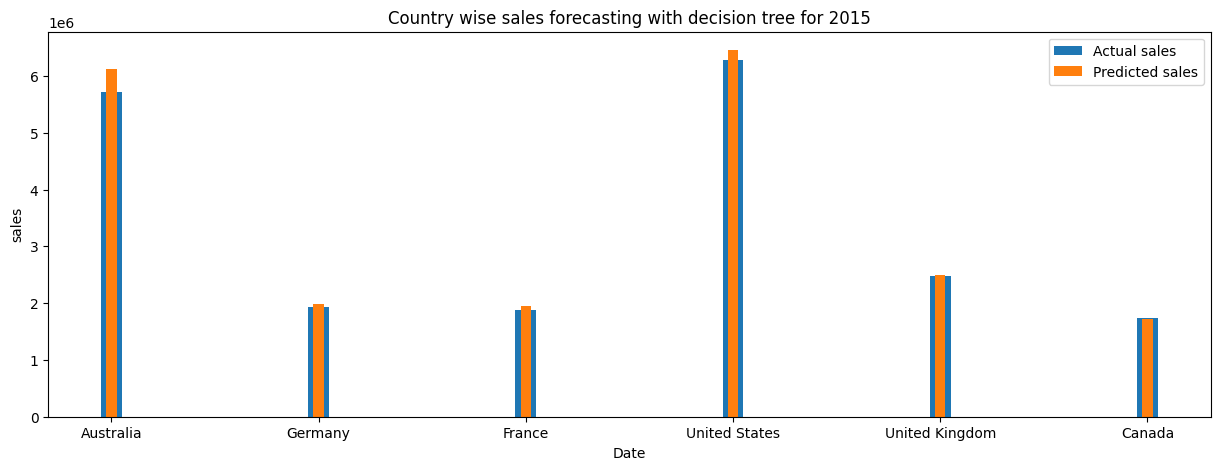

MAE: 120568.43955585004
0.9905678491329405


In [ ]:
#### COUNTRY WISE WISE SALES PREDICTION FOR NEXT YEAR WITH DECISION TREE.
country = newdf['Country'].unique()
print(country)
predicted_country_rev = {}
original_country_rev = {}
for i in country:
  country_df = newdf[newdf['Country']==i]
  le = LabelEncoder()
  for label in str_labels:
    country_df[label] = le.fit_transform(country_df[label])
  country_rev = country_df['Revenue']
  country_df = country_df.drop('Revenue', axis=1)
  pred = model.predict(country_df)
  predicted_country_rev[i] = np.sum(pred)
  original_country_rev[i] = np.sum(country_rev)

print(predicted_country_rev)
print(original_country_rev)

plt.figure(figsize=(15, 5))
plt.bar(country, original_country_rev.values(), width=0.1)
plt.bar(country, predicted_country_rev.values(), width = 0.05)
plt.title("Country wise sales forecasting with decision tree for 2015")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(['Actual sales', 'Predicted sales'])
plt.show()

mae = mean_absolute_error(np.array(list(original_country_rev.values())), np.array(list(predicted_country_rev.values())))
print("MAE:", mae)
print(r2_score(np.array(list(original_country_rev.values())), np.array(list(predicted_country_rev.values()))))

In [ ]:
''' Here We can see that the yearly sales for different age groups Predicted by our model 
is good with a few diversions with a MAE of 65097.073790531605 and we can see that Canada have very
less share in the sales because its purchasing power was also less while doing EDA while US and Australia
 have the highest share in the sales approving their purchasing powers in EDA.'''

In [ ]:
## PRODUCT WISE WISE SALES PREDICTION FOR NEXT YEAR WITH DECISION TREE.

['Road Bikes' 'Mountain Bikes' 'Bottles and Cages' 'Jerseys'
 'Tires and Tubes' 'Helmets' 'Bike Stands' 'Touring Bikes' 'Gloves' 'Caps'
 'Fenders' 'Socks' 'Hydration Packs' 'Vests' 'Cleaners' 'Bike Racks'
 'Shorts']


<ipython-input-53-4f3e95a35d79>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[label] = le.fit_transform(category_df[label])
<ipython-input-53-4f3e95a35d79>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[label] = le.fit_transform(category_df[label])
<ipython-input-53-4f3e95a35d79>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

{'Road Bikes': 7555804.277755028, 'Mountain Bikes': 6275058.651582474, 'Bottles and Cages': 284307.2827323824, 'Jerseys': 928722.4584027732, 'Tires and Tubes': 1003897.9772989016, 'Helmets': 1248344.9196888304, 'Bike Stands': 89018.26729879962, 'Touring Bikes': 2030994.4065116702, 'Gloves': 185689.62918454432, 'Caps': 113485.78770569645, 'Fenders': 278109.3975738401, 'Socks': 31971.082712412826, 'Hydration Packs': 230754.6381904967, 'Vests': 244025.71793660783, 'Cleaners': 41412.90743696525, 'Bike Racks': 107910.94885055021, 'Shorts': 433757.3403584444}
{'Road Bikes': 7279822, 'Mountain Bikes': 5581524, 'Bottles and Cages': 285144, 'Jerseys': 927556, 'Tires and Tubes': 1004202, 'Helmets': 1250303, 'Bike Stands': 88822, 'Touring Bikes': 1937737, 'Gloves': 185339, 'Caps': 113612, 'Fenders': 277261, 'Socks': 31942, 'Hydration Packs': 230850, 'Vests': 246717, 'Cleaners': 41559, 'Bike Racks': 107813, 'Shorts': 433788}


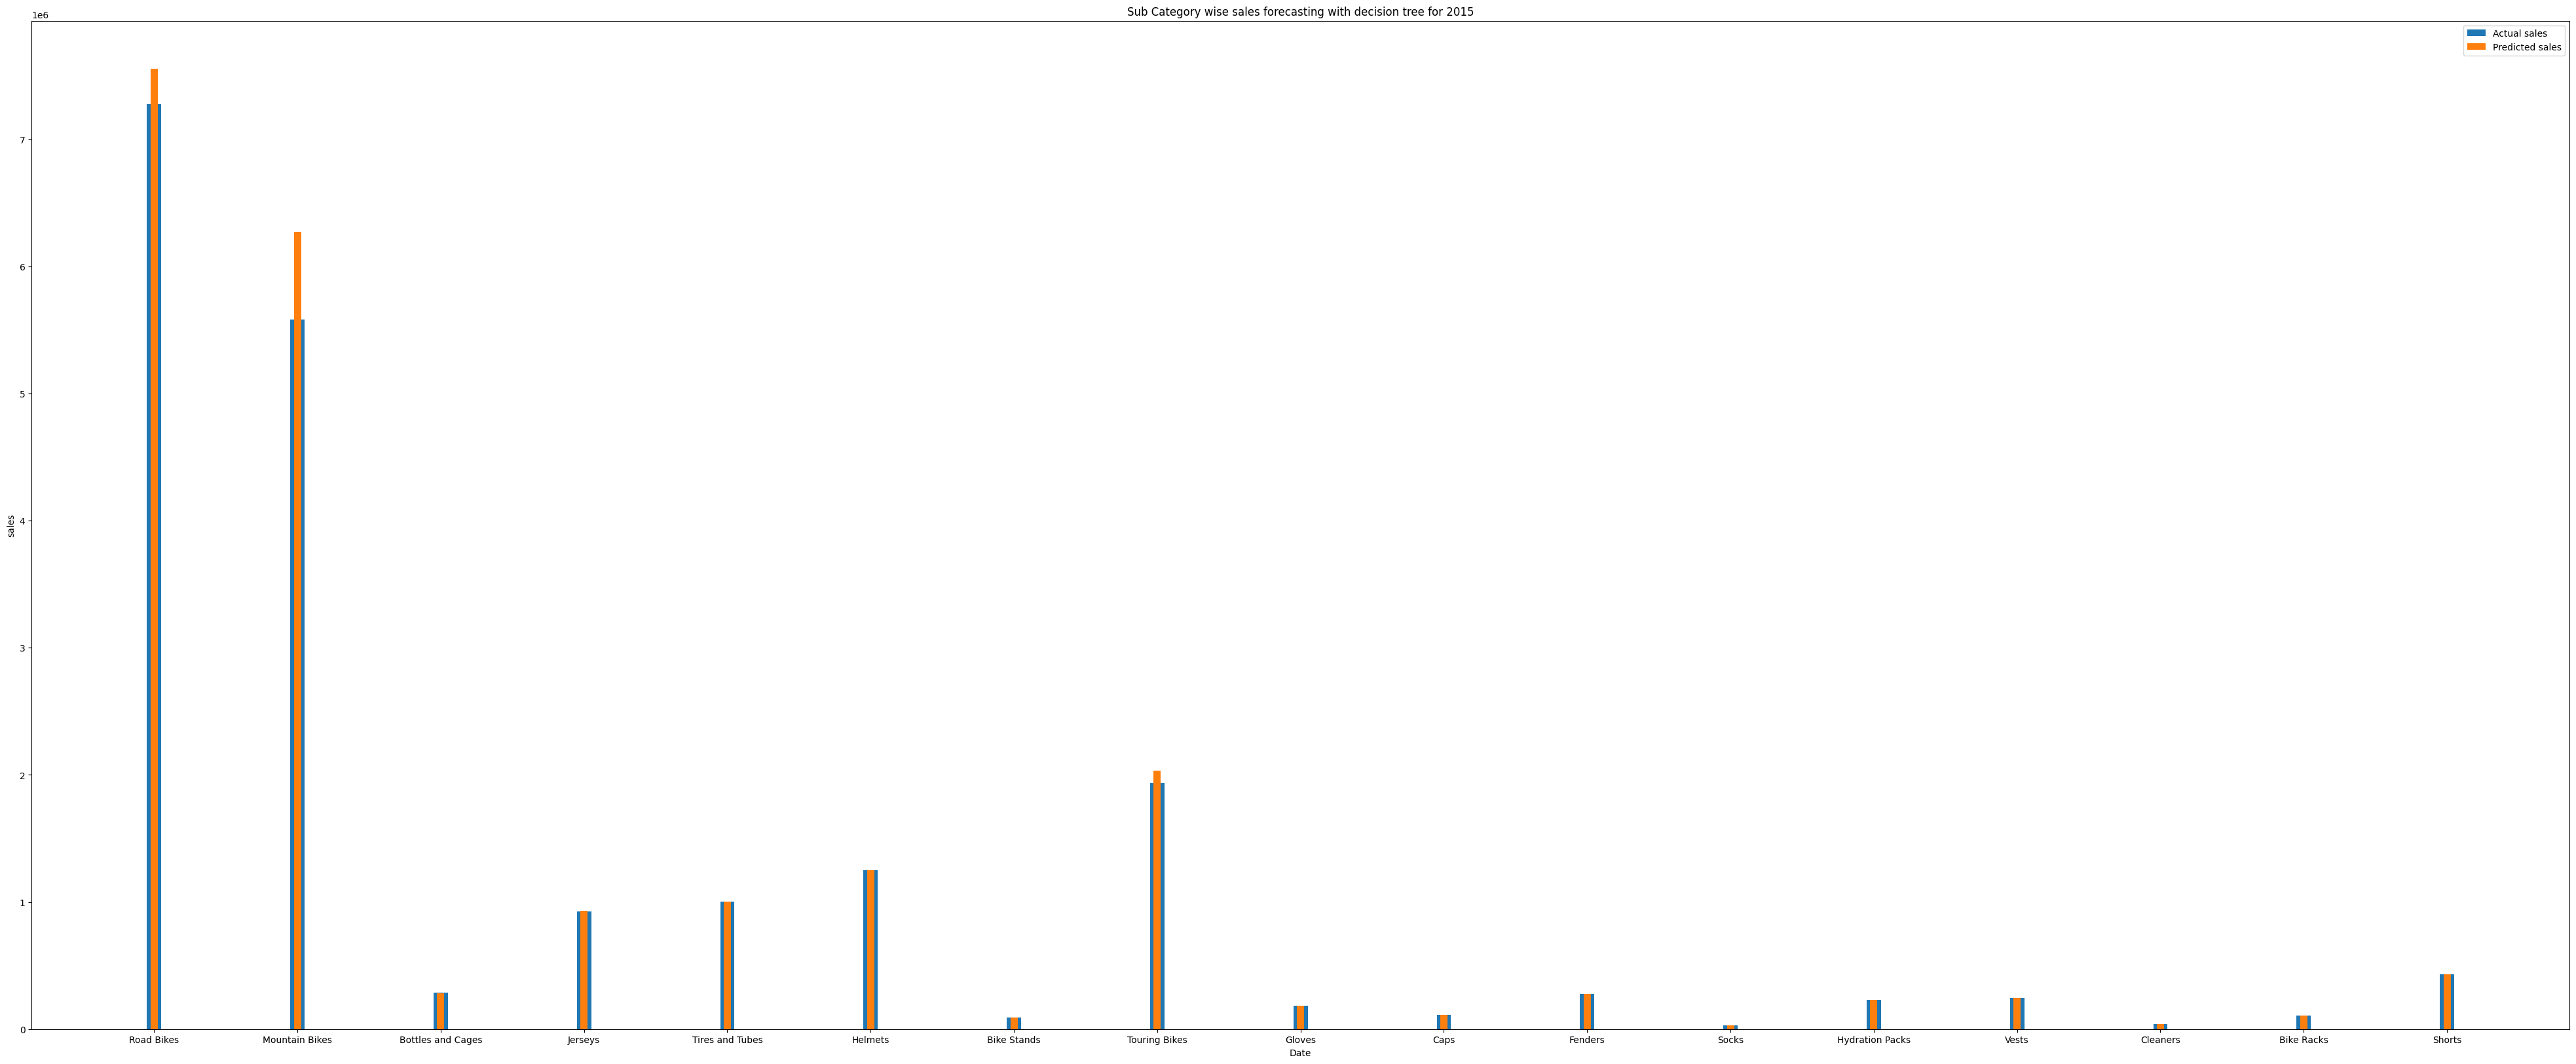

MAE: 63038.326383750995
0.9917125685350219


In [ ]:
category = newdf['Sub_Category'].unique()
print(category)
predicted_category_rev = {}
original_category_rev = {}
for i in category:
  category_df = newdf[newdf['Sub_Category']==i]
  le = LabelEncoder()
  for label in str_labels:
    category_df[label] = le.fit_transform(category_df[label])
  category_rev = category_df['Revenue']
  category_df = category_df.drop('Revenue', axis=1)
  pred = model.predict(category_df)
  predicted_category_rev[i] = np.sum(pred)
  original_category_rev[i] = np.sum(category_rev)

print(predicted_category_rev)
print(original_category_rev)

plt.figure(figsize=(50, 20))
plt.bar(category, original_category_rev.values(), width=0.1)
plt.bar(category, predicted_category_rev.values(), width = 0.05)
plt.title("Sub Category wise sales forecasting with decision tree for 2015")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(['Actual sales', 'Predicted sales'])
plt.show()

mae = mean_absolute_error(np.array(list(original_category_rev.values())), np.array(list(predicted_category_rev.values())))
print("MAE:", mae)
print(r2_score(np.array(list(original_category_rev.values())), np.array(list(predicted_category_rev.values()))))

In [ ]:
''' Here We can see that the yearly sales for different age groups Predicted by our model 
is good with a few diversions with a MAE of 63038.073790531605 and we can see that road bikes and mountain bikes have very
most share in the sales because they are expensive too while socks and cleaners
 have the lowest share due to their cheap rates.'''

In [ ]:
### Applying Regularisation--> ElasticNet

In [ ]:

from numpy.random import seed
seed(1)
# from tensorflow import set_random_seed
# set_random_seed(1)
import math
from numpy import arange
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from math import sqrt
import pandas as pd
from numpy.ma.core import ceil
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales.csv");
# Load the time series data
str_labels = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State','Product_Category','Sub_Category','Product']
# create LabelEncoder object
le = LabelEncoder()
for label in str_labels:
  df[label] = le.fit_transform(df[label])

In [ ]:
df = df.sort_values('Date')

In [ ]:
#preprocessing 
meantrades = df['Revenue'].mean()
print(meantrades)
df['Revenue'].fillna(value=meantrades, inplace=True)
df = df.drop(columns = ['Day','Month',"Year"   ], axis = 1,errors='ignore')


754.3703598853463


In [ ]:
dfscaled = df

In [ ]:
list(df["Date"])[:5]

['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01']

In [ ]:
from copy import deepcopy

In [ ]:
temp = list(df["Date"])
dicts={}
count = 0;
temp_new = sorted(deepcopy(temp));
abc = temp[0];
for xyz in temp[1:]:
    if(xyz!=abc):
        count+=1;
    dicts[xyz] = count;
temp_new = [dicts[xyz] for xyz in temp];
df["Date"] = temp_new;



index0
window 2
df2.shape=(113036, 15)
dftr.shape=(90000, 15)
dftesx.shape=(90000, 14) dftesY.shape=(90000,)


train rmse error of best model
1.021254564952723
test rmse error of best model
0.8255877717428844


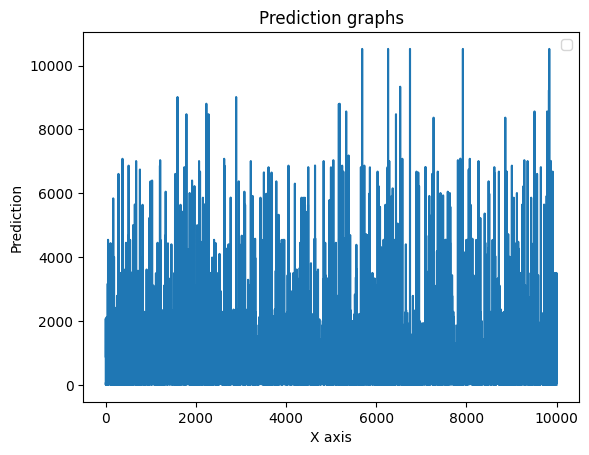

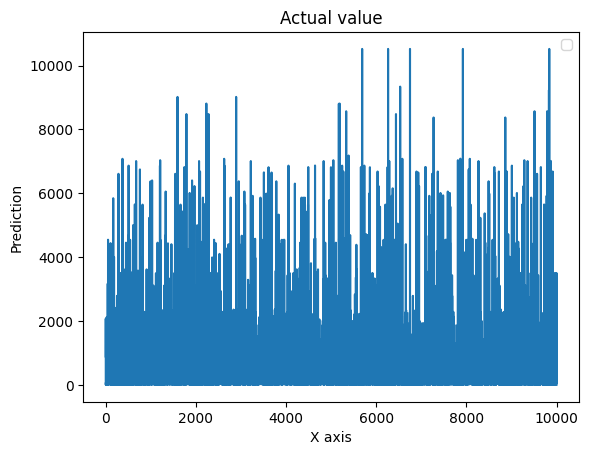

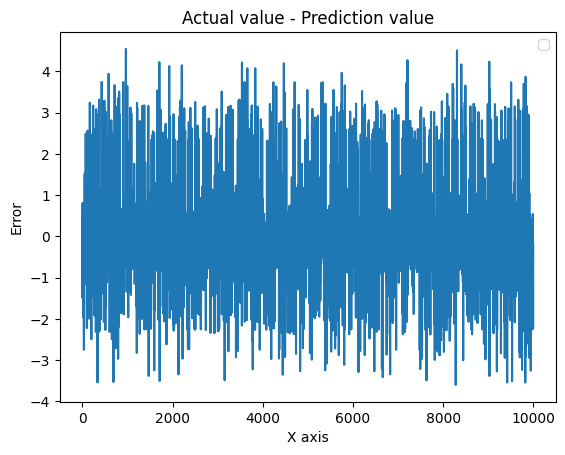

high
1.117797161942031
mid
0.39171912617464266
low
0.3290449270778692


In [ ]:
# window 2
le = len(dfscaled)
window = [2]
# window = [15]
def transdata(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  
  df2['Revenue'+str(win+1)] = df2['Revenue'].shift(-(win)) #stepback i-1 times
  return df2
highcost = [152.42, 302.35, 359.43]
lowcost = [133.96, 251.55, 254.24]
ind = [(0,80000,80000,90000,90000,100000)]
for index in range(1):
  print('index'+str(index))
  for prevd in window:
    print('window '+str(prevd))
    #transforming data
    # df2 = transdata(df, prevd)
    df2 = df;
    df2 = df2.dropna()
    print(f"df2.shape={df2.shape}")
    #split
    # print(df2.loc[ind[index][4]:ind[index][5]].shape)
    dftr = df2[ind[index][0]:ind[index][3]]
    print(f"dftr.shape={dftr.shape}")
    # dftr = deepcopy(df2.loc[1300:2100])
    dftrY = dftr['Revenue'].to_numpy()  
    dftrX = dftr.drop(['Revenue'], axis = 1).to_numpy() 
    dftes = df2[ind[index][4]:ind[index][5]]
    dftesY = dftes['Revenue'].to_numpy()
    dftesX = dftes.drop(['Revenue'], axis = 1).to_numpy()
    print(f"dftesx.shape={dftrX.shape} dftesY.shape={dftrY.shape}")
    regressor = ElasticNet()
    grid = dict()
    grid['alpha'] = [ 1e-4, 1e-3]
    grid['l1_ratio'] = arange(0, 1, 0.4)
    search = GridSearchCV(regressor, grid, scoring='neg_root_mean_squared_error',   n_jobs=-1)
    leastvalerr = 1e9

    estimator = search.fit(dftrX, dftrY)
    tep = estimator.predict(dftesX)
    trp = estimator.predict(dftrX)
    import pickle
    pickle.dump(estimator, open('model_gridcv_on_regul_and_l1ratio.sav', 'wb'))
   
     
    print("train rmse error of best model")
    print(sqrt(mean_squared_error(trp, dftrY)))
    print("test rmse error of best model")
    print(sqrt(mean_squared_error(tep, dftesY)))
    
    # ---
    # plot the curves
    plt.plot([i for i in range(len(tep))], tep)
    
    # set plot title, axis labels, and legend
    plt.title('Prediction graphs')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()

    '''
    '''
    plt.plot([i for i in range(len(dftesY))], dftesY)
    plt.title('Actual value')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()
    plt.plot([i for i in range(len(dftesY))], dftesY-tep)
    plt.title('Actual value - Prediction value')
    plt.xlabel('X axis')
    plt.ylabel('Error')
    plt.legend()

    # show the plot
    plt.show()
    # ---
    high,mid,low = [],[],[]
    # print(dftesY.shape)
    for i in range(len(dftesY)):
      if(dftesY[i] > highcost[index] ):
        high.append( (dftesY[i] - tep[i])**2)
      elif(dftesY[i] < lowcost[index]):
        low.append( (dftesY[i] - tep[i])**2)
      else:
        mid.append((dftesY[i] - tep[i])**2 )
    if(len(high) > 0):
      print('high')
      print(sqrt(sum(high)/len(high)))
    if(len(mid) > 0):
      print('mid')
      print(sqrt(sum(mid)/len(mid)))
    if(len(low) > 0):
      print('low')
      print(sqrt(sum(low)/len(low)))
     
        

In [ ]:
''' As you can see 
train rmse error of best model : 1.021254564952723
test rmse error of best model : 0.8255877717428844
Initially our RSME in LR is about 18, Now with the regularisation it get improved as we are expecting
this is because in ElasticNet we combine both L1 and L2 regularistaion. 


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


index0
window 2
df2.shape=(113036, 15)
dftr.shape=(90000, 15)
dftesx.shape=(90000, 14) dftesY.shape=(90000,)


train rmse error of best model
8.230586751424866
test rmse error of best model
8.267245545611074


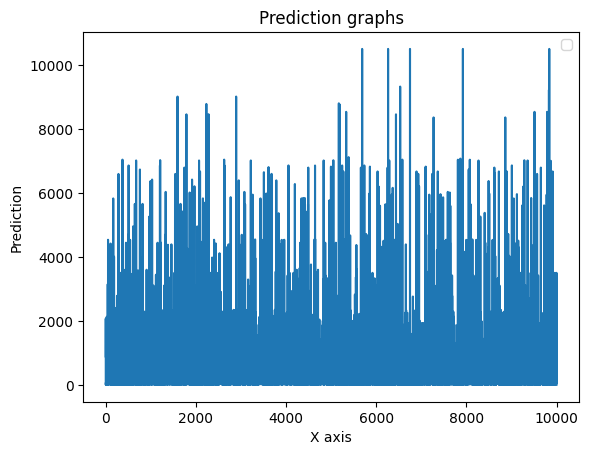

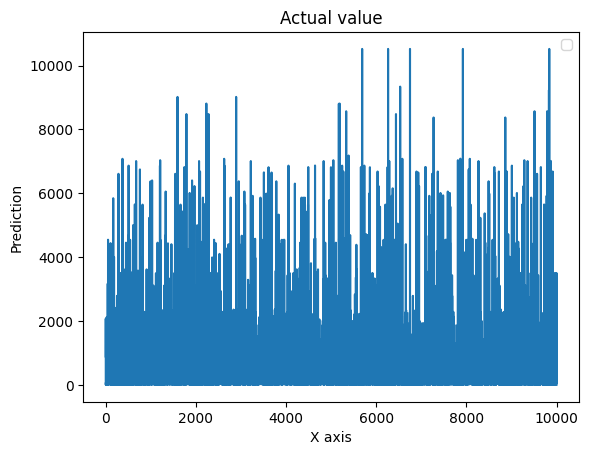

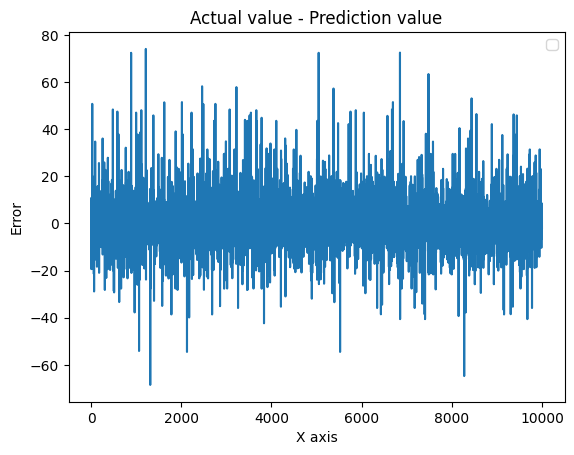

high
11.340624005580201
mid
4.684439800402028
low
2.6247954181388193


In [ ]:
## Applying XGBoost 

import xgboost as xg
le = len(dfscaled)

window = [2]
# window = [15]

def transdata(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  
  df2['Revenue'+str(win+1)] = df2['Revenue'].shift(-(win)) #stepback i-1 times
  return df2
highcost = [152.42, 302.35, 359.43]
lowcost = [133.96, 251.55, 254.24]
ind = [(0,80000,80000,90000,90000,100000)]
for index in range(1):
  print('index'+str(index))
  for prevd in window:
    print('window '+str(prevd))
    #transforming data
    # df2 = transdata(df, prevd)
    df2 = df;
    df2 = df2.dropna()
    print(f"df2.shape={df2.shape}")
    #split
    # print(df2.loc[ind[index][4]:ind[index][5]].shape)
    dftr = df2[ind[index][0]:ind[index][3]]
    print(f"dftr.shape={dftr.shape}")
    # dftr = deepcopy(df2.loc[1300:2100])
    dftrY = dftr['Revenue'].to_numpy()  
    dftrX = dftr.drop(['Revenue'], axis = 1).to_numpy() 

    params = {'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200, 500]}

    dftes = df2[ind[index][4]:ind[index][5]]
    # dftes =  deepcopy(df2.loc[2100:2300])
    # dftesY = dftes['Revenue'+str(prevd+1)].to_numpy()
    # dftesX = dftes.drop(['Revenue'+str(prevd+1)], axis = 1).to_numpy()
    dftesY = dftes['Revenue'].to_numpy()
    dftesX = dftes.drop(['Revenue'], axis = 1).to_numpy()
    print(f"dftesx.shape={dftrX.shape} dftesY.shape={dftrY.shape}")

    # dftrX,   dftesX = np.reshape(dftrX, (dftrX.shape[0], 1, dftrX.shape[1])),   np.reshape(dftesX, (dftesX.shape[0], 1, dftesX.shape[1]))
    
    regressor = xg.XGBRegressor();
    
    search = GridSearchCV(regressor, params, scoring='neg_root_mean_squared_error',   n_jobs=-1)
    leastvalerr = 1e9

    estimator = search.fit(dftrX, dftrY)
    tep = estimator.predict(dftesX)
    trp = estimator.predict(dftrX)
    import pickle
    pickle.dump(estimator, open('model_gridcv_on_regul_and_l1ratio.sav', 'wb'))
   
     
    print("train rmse error of best model")
    print(sqrt(mean_squared_error(trp, dftrY)))
    print("test rmse error of best model")
    print(sqrt(mean_squared_error(tep, dftesY)))
    
    # ---
    # plot the curves
    plt.plot([i for i in range(len(tep))], tep)
    
    # set plot title, axis labels, and legend
    plt.title('Prediction graphs')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()

    '''
    '''
    plt.plot([i for i in range(len(dftesY))], dftesY)
    plt.title('Actual value')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()
    plt.plot([i for i in range(len(dftesY))], dftesY-tep)
    plt.title('Actual value - Prediction value')
    plt.xlabel('X axis')
    plt.ylabel('Error')
    plt.legend()

    # show the plot
    plt.show()
    # ---
    high,mid,low = [],[],[]
    # print(dftesY.shape)
    for i in range(len(dftesY)):
      if(dftesY[i] > highcost[index] ):
        high.append( (dftesY[i] - tep[i])**2)
      elif(dftesY[i] < lowcost[index]):
        low.append( (dftesY[i] - tep[i])**2)
      else:
        mid.append((dftesY[i] - tep[i])**2 )
    if(len(high) > 0):
      print('high')
      print(sqrt(sum(high)/len(high)))
    if(len(mid) > 0):
      print('mid')
      print(sqrt(sum(mid)/len(mid)))
    if(len(low) > 0):
      print('low')
      print(sqrt(sum(low)/len(low)))
     
        

In [ ]:
''' In XgBoost Our rmse error get reduced as compared to Linear Regression and Decision Tree
Now we will use PCA techinque for futher more optimization.

index0
window 2
df2.shape=(113036, 15)
dftr.shape=(90000, 15)
dftesx.shape=(90000, 14) dftesY.shape=(90000,)


train rmse error of best model
0.7208423018024691
test rmse error of best model
0.6139800567406719


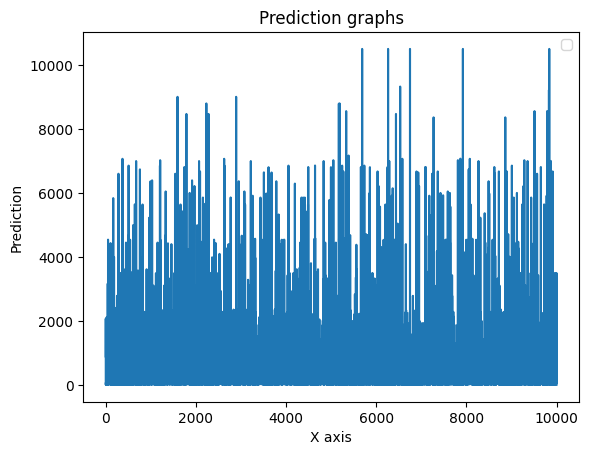

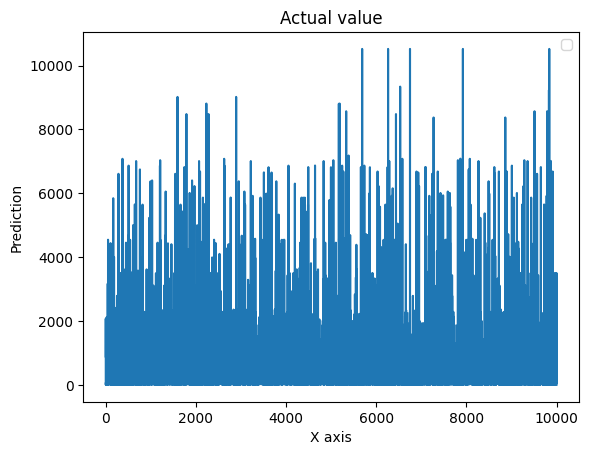

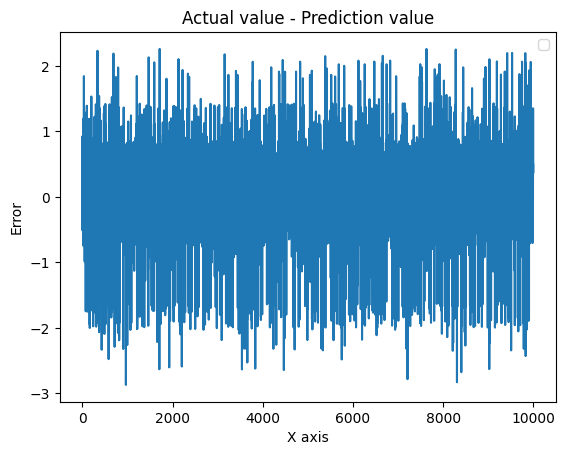

high
0.76921494201039
mid
0.45462176901497764
low
0.39788057862155357


In [ ]:
### With PCA ELastic Net
# window 20, rmse corrected, data 1300:2300
from sklearn.decomposition import PCA
le = len(dfscaled)

window = [2]
# window = [15]

def transdata(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  
  df2['Revenue'+str(win+1)] = df2['Revenue'].shift(-(win)) #stepback i-1 times
  return df2
highcost = [152.42, 302.35, 359.43]
lowcost = [133.96, 251.55, 254.24]
ind = [(0,80000,80000,90000,90000,100000)]
for index in range(1):
  print('index'+str(index))
  for prevd in window:
    print('window '+str(prevd))
    #transforming data
    # df2 = transdata(df, prevd)
    df2 = df;
    df2 = df2.dropna()
    print(f"df2.shape={df2.shape}")
    #split
    # print(df2.loc[ind[index][4]:ind[index][5]].shape)
    dftr = df2[ind[index][0]:ind[index][3]]
    print(f"dftr.shape={dftr.shape}")
    # dftr = deepcopy(df2.loc[1300:2100])
    dftrY = dftr['Revenue'].to_numpy()  
    dftrX = dftr.drop(['Revenue'], axis = 1).to_numpy() 

    
  

    dftes = df2[ind[index][4]:ind[index][5]]
    # dftes =  deepcopy(df2.loc[2100:2300])
    # dftesY = dftes['Revenue'+str(prevd+1)].to_numpy()
    # dftesX = dftes.drop(['Revenue'+str(prevd+1)], axis = 1).to_numpy()
    dftesY = dftes['Revenue'].to_numpy()
    dftesX = dftes.drop(['Revenue'], axis = 1).to_numpy()
    print(f"dftesx.shape={dftrX.shape} dftesY.shape={dftrY.shape}")

    # dftrX,   dftesX = np.reshape(dftrX, (dftrX.shape[0], 1, dftrX.shape[1])),   np.reshape(dftesX, (dftesX.shape[0], 1, dftesX.shape[1]))
    
    regressor = ElasticNet()
    grid = dict()
    grid['alpha'] = [ 1e-4, 1e-3]
    grid['l1_ratio'] = arange(0, 1, 0.4)
    search = GridSearchCV(regressor, grid, scoring='neg_root_mean_squared_error',   n_jobs=-1)
    leastvalerr = 1e9
    pca = PCA(n_components=5)
    dftrX = pca.fit_transform(dftrX)
    dftesX = pca.transform(dftesX)


    estimator = search.fit(dftrX, dftrY)
    tep = estimator.predict(dftesX)
    trp = estimator.predict(dftrX)
    import pickle
    pickle.dump(estimator, open('model_gridcv_on_regul_and_l1ratio.sav', 'wb'))
   
     
    print("train rmse error of best model")
    print(sqrt(mean_squared_error(trp, dftrY)))
    print("test rmse error of best model")
    print(sqrt(mean_squared_error(tep, dftesY)))
    
    # ---
    # plot the curves
    plt.plot([i for i in range(len(tep))], tep)
    
    # set plot title, axis labels, and legend
    plt.title('Prediction graphs')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()

    '''
    '''
    plt.plot([i for i in range(len(dftesY))], dftesY)
    plt.title('Actual value')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()
    plt.plot([i for i in range(len(dftesY))], dftesY-tep)
    plt.title('Actual value - Prediction value')
    plt.xlabel('X axis')
    plt.ylabel('Error')
    plt.legend()

    # show the plot
    plt.show()
    # ---
    high,mid,low = [],[],[]
    # print(dftesY.shape)
    for i in range(len(dftesY)):
      if(dftesY[i] > highcost[index] ):
        high.append( (dftesY[i] - tep[i])**2)
      elif(dftesY[i] < lowcost[index]):
        low.append( (dftesY[i] - tep[i])**2)
      else:
        mid.append((dftesY[i] - tep[i])**2 )
    if(len(high) > 0):
      print('high')
      print(sqrt(sum(high)/len(high)))
    if(len(mid) > 0):
      print('mid')
      print(sqrt(sum(mid)/len(mid)))
    if(len(low) > 0):
      print('low')
      print(sqrt(sum(low)/len(low)))
     
        

index0
window 2
df2.shape=(113036, 15)
dftr.shape=(90000, 15)
dftesx.shape=(90000, 14) dftesY.shape=(90000,)


train rmse error of best model
25.57783189802092
test rmse error of best model
76.49888789902742


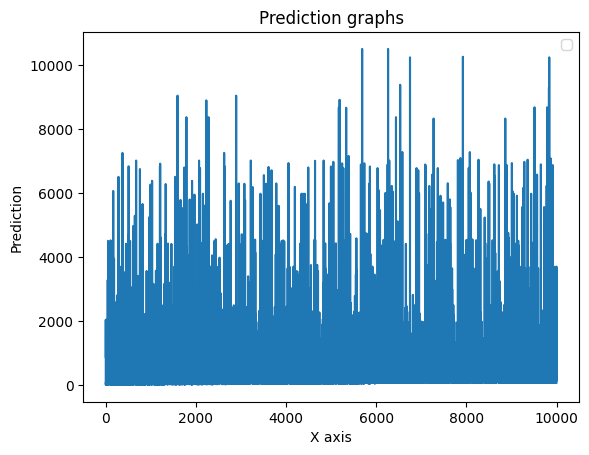

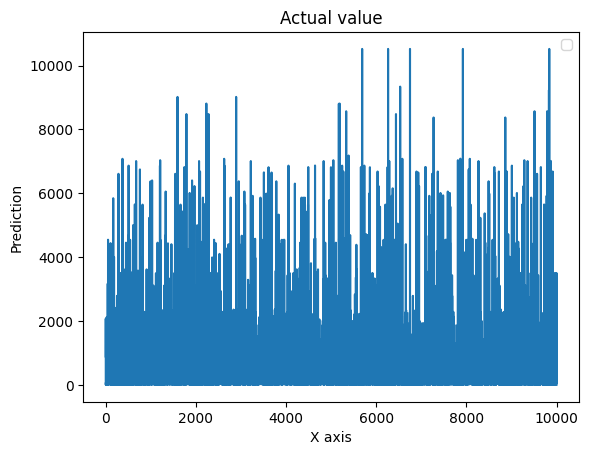

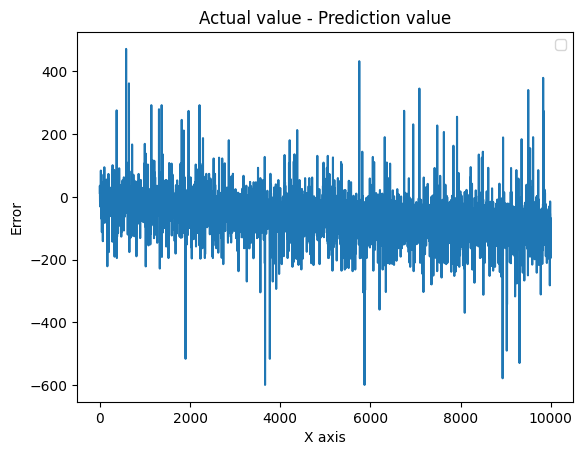

high
94.3048442137829
mid
68.96814904270023
low
51.6784776576687


In [ ]:
# XG With PCA
import xgboost as xg
le = len(dfscaled)

window = [2]
# window = [15]

def transdata(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  
  df2['Revenue'+str(win+1)] = df2['Revenue'].shift(-(win)) #stepback i-1 times
  return df2
highcost = [152.42, 302.35, 359.43]
lowcost = [133.96, 251.55, 254.24]
ind = [(0,80000,80000,90000,90000,100000)]
for index in range(1):
  print('index'+str(index))
  for prevd in window:
    print('window '+str(prevd))
    #transforming data
    # df2 = transdata(df, prevd)
    df2 = df;
    df2 = df2.dropna()
    print(f"df2.shape={df2.shape}")
    #split
    # print(df2.loc[ind[index][4]:ind[index][5]].shape)
    dftr = df2[ind[index][0]:ind[index][3]]
    print(f"dftr.shape={dftr.shape}")
    # dftr = deepcopy(df2.loc[1300:2100])
    dftrY = dftr['Revenue'].to_numpy()  
    dftrX = dftr.drop(['Revenue'], axis = 1).to_numpy() 

    params = {'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200, 500]}

    dftes = df2[ind[index][4]:ind[index][5]]
    # dftes =  deepcopy(df2.loc[2100:2300])
    # dftesY = dftes['Revenue'+str(prevd+1)].to_numpy()
    # dftesX = dftes.drop(['Revenue'+str(prevd+1)], axis = 1).to_numpy()
    dftesY = dftes['Revenue'].to_numpy()
    dftesX = dftes.drop(['Revenue'], axis = 1).to_numpy()
    print(f"dftesx.shape={dftrX.shape} dftesY.shape={dftrY.shape}")

    # dftrX,   dftesX = np.reshape(dftrX, (dftrX.shape[0], 1, dftrX.shape[1])),   np.reshape(dftesX, (dftesX.shape[0], 1, dftesX.shape[1]))
    
    regressor = xg.XGBRegressor();
    
    search = GridSearchCV(regressor, params, scoring='neg_root_mean_squared_error',   n_jobs=-1)
    leastvalerr = 1e9
    pca = PCA(n_components=5)
    dftrX = pca.fit_transform(dftrX)
    dftesX = pca.transform(dftesX)

    estimator = search.fit(dftrX, dftrY)
    tep = estimator.predict(dftesX)
    trp = estimator.predict(dftrX)
    import pickle
    pickle.dump(estimator, open('model_gridcv_on_regul_and_l1ratio.sav1', 'wb'))
   
     
    print("train rmse error of best model")
    print(sqrt(mean_squared_error(trp, dftrY)))
    print("test rmse error of best model")
    print(sqrt(mean_squared_error(tep, dftesY)))
    
    # ---
    # plot the curves
    plt.plot([i for i in range(len(tep))], tep)
    
    # set plot title, axis labels, and legend
    plt.title('Prediction graphs')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()

    '''
    '''
    plt.plot([i for i in range(len(dftesY))], dftesY)
    plt.title('Actual value')
    plt.xlabel('X axis')
    plt.ylabel('Prediction')
    plt.legend()

    # show the plot
    plt.show()
    plt.plot([i for i in range(len(dftesY))], dftesY-tep)
    plt.title('Actual value - Prediction value')
    plt.xlabel('X axis')
    plt.ylabel('Error')
    plt.legend()

    # show the plot
    plt.show()
    # ---
    high,mid,low = [],[],[]
    # print(dftesY.shape)
    for i in range(len(dftesY)):
      if(dftesY[i] > highcost[index] ):
        high.append( (dftesY[i] - tep[i])**2)
      elif(dftesY[i] < lowcost[index]):
        low.append( (dftesY[i] - tep[i])**2)
      else:
        mid.append((dftesY[i] - tep[i])**2 )
    if(len(high) > 0):
      print('high')
      print(sqrt(sum(high)/len(high)))
    if(len(mid) > 0):
      print('mid')
      print(sqrt(sum(mid)/len(mid)))
    if(len(low) > 0):
      print('low')
      print(sqrt(sum(low)/len(low)))
     
        

In [ ]:
'''It is not necessarily true that the RMSE of the Elastic Net model will always be less than that of the PCA with Elastic Net model. The performance of these models depends on various factors such as the size and complexity of the dataset, the number of features, the strength of the correlations between the features and target variable, and the choice of hyperparameters.

In some cases, PCA may lead to a significant reduction in the number of features, which can improve the performance of the Elastic Net model by reducing overfitting. In other cases, the Elastic Net model may be able to achieve better performance by utilizing all the features without the need for dimensionality reduction.'''

'It is not necessarily true that the RMSE of the Elastic Net model will always be less than that of the PCA with Elastic Net model. The performance of these models depends on various factors such as the size and complexity of the dataset, the number of features, the strength of the correlations between the features and target variable, and the choice of hyperparameters.\n\nIn some cases, PCA may lead to a significant reduction in the number of features, which can improve the performance of the Elastic Net model by reducing overfitting. In other cases, the Elastic Net model may be able to achieve better performance by utilizing all the features without the need for dimensionality reduction.'

In [ ]:
from numpy.random import seed
seed(1)
# from tensorflow import set_random_seed
# set_random_seed(1)
import math
from numpy import arange
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from math import sqrt
import pandas as pd
from numpy.ma.core import ceil
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales.csv");
# Load the time series data
str_labels = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State','Product_Category','Sub_Category','Product']
# create LabelEncoder object
le = LabelEncoder()
for label in str_labels:
  df[label] = le.fit_transform(df[label])

In [ ]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,9,2013,19,3,1,1,5,0,0,12,8,45,120,590,360,950
1,2015-11-26,26,9,2015,19,3,1,1,5,0,0,12,8,45,120,590,360,950
2,2014-03-23,23,7,2014,49,0,1,0,26,0,0,12,23,45,120,1366,1035,2401
3,2016-03-23,23,7,2016,49,0,1,0,26,0,0,12,20,45,120,1188,900,2088
4,2014-05-15,15,8,2014,47,0,0,0,26,0,0,12,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,0,2016,41,0,1,4,8,2,16,5,3,24,64,112,72,184
113032,2014-04-02,2,0,2014,18,3,1,0,35,2,16,4,22,24,64,655,528,1183
113033,2016-04-02,2,0,2016,18,3,1,0,35,2,16,4,22,24,64,655,528,1183
113034,2014-03-04,4,7,2014,37,0,0,2,37,2,16,3,24,24,64,684,576,1260


In [ ]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode the categorical variables using LabelEncoder
cat_vars = ['Day', 'Month', 'Year', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
le = LabelEncoder()
for var in cat_vars:
    df[var] = le.fit_transform(df[var].astype(str))

# Encode the "Date" column using LabelEncoder
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
le_date = LabelEncoder()
df['Date'] = le_date.fit_transform(df['Date'])

# Perform normalization on the numerical variables
num_vars = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost']
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# Split the data into training and testing sets
X = df.drop(columns=['Revenue'])
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = 
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R-squared: ", r2)

MSE:  6778.022572761855
R-squared:  0.9961249870573057


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

82.32874694031153


In [ ]:
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the RMSE values
rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the random forest regressor model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf.predict(X_test)

    # Calculate RMSE for this fold
    rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse_fold)

# Calculate the average RMSE over all folds
avg_rmse = np.mean(rmse_scores)

# Print the average RMSE
print("Average RMSE: ", avg_rmse)

Average RMSE:  44.31867454822607


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the neural network model
model = Sequential()

# Add a hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Add an output layer with a single neuron (for regression) and linear activation
model.add(Dense(1, activation='linear'))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model for 100 epochs with a batch size of 32
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_train)
# Calculate RMSE for the predictions
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred2))


In [ ]:
print("RMSE Test: ", rmse_test)
print("RMSE Train: ", rmse_train)

RMSE Test:  0.3377558452724246
RMSE Train:  0.3171605123805297


In [ ]:

model={'Neural Network':0.3377,'Elastic Net-PCA':0.6139,'Elastic Net':0.8255,'Xgboost Regressor':8.2672,'Decision Tree':17.5520,'Random Forest':44.3186,'Linear Regression':56.0017,'Xgboost Regressor-PCA':76.4988}

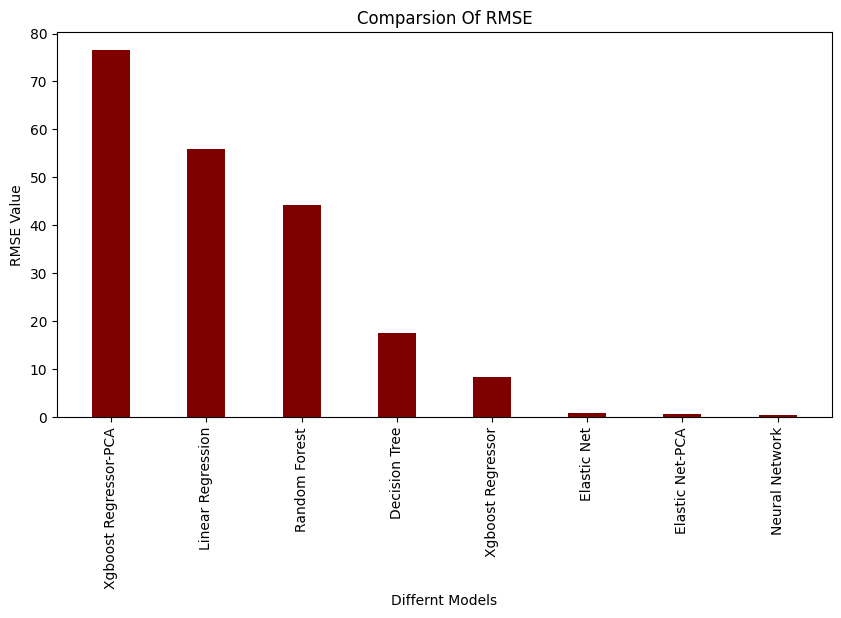

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = model
courses = list(reversed(model.keys()))
values = list(reversed(model.values()))

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("Differnt Models")
plt.ylabel("RMSE Value")
plt.title("Comparsion Of RMSE")
plt.xticks(rotation='vertical')

plt.show()
